## Data Inspection

I am beginning the task with data inspection to see if there are some patterns that I can recognise among the spikes. Also, the question prompt says that there are different types of data in the csv, each with increasing difficulty. Which means I might have to aim for a strategy that correctly categorizes the spikes for at least the data streams given. It is also imperative that the data processing should be done in real time. So, I will not be trying to aim for any sort of neural network based classification. Which leaves filtering and peak detection.

In [22]:
## copying the code from data_visulaization.py to see the data clearly.

import sys
import math

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [20, 10]

In [23]:
## loading the csv file
csv_file = "example_data.csv"

In [24]:
## See how big the csv file is and how many rows there are

with open(csv_file, 'r') as f:
    original_data = f.read().split('\n')[1:]
    print(len(original_data))

7


In [25]:
## check if all columns have data or not

with open(csv_file, 'r') as f:
    original_data = f.read().split('\n')[1:]
    print(len(original_data[6]))

0


So, data exists in rows 0->5. 6th row is empty

Now I'll try to read and visualize the data from each file and see what kind of patterns emerge, if any

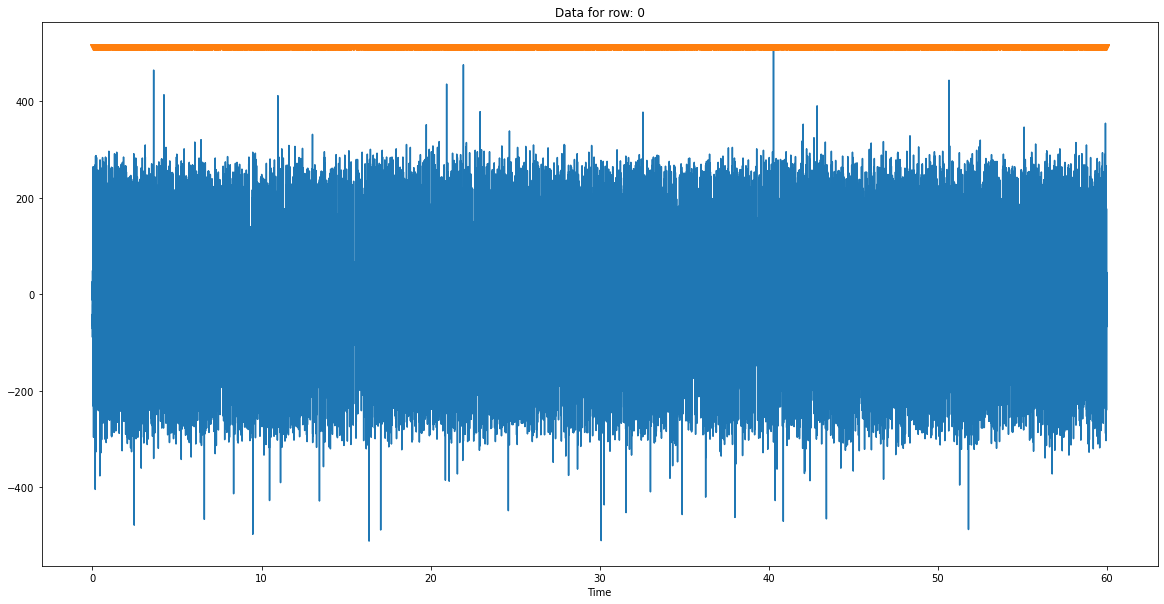

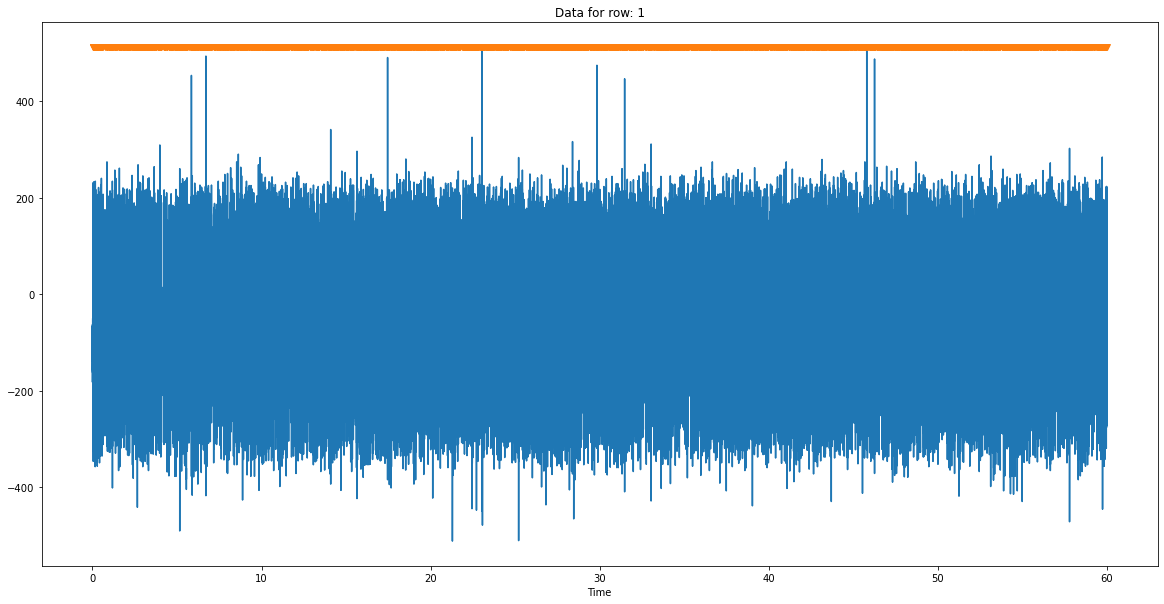

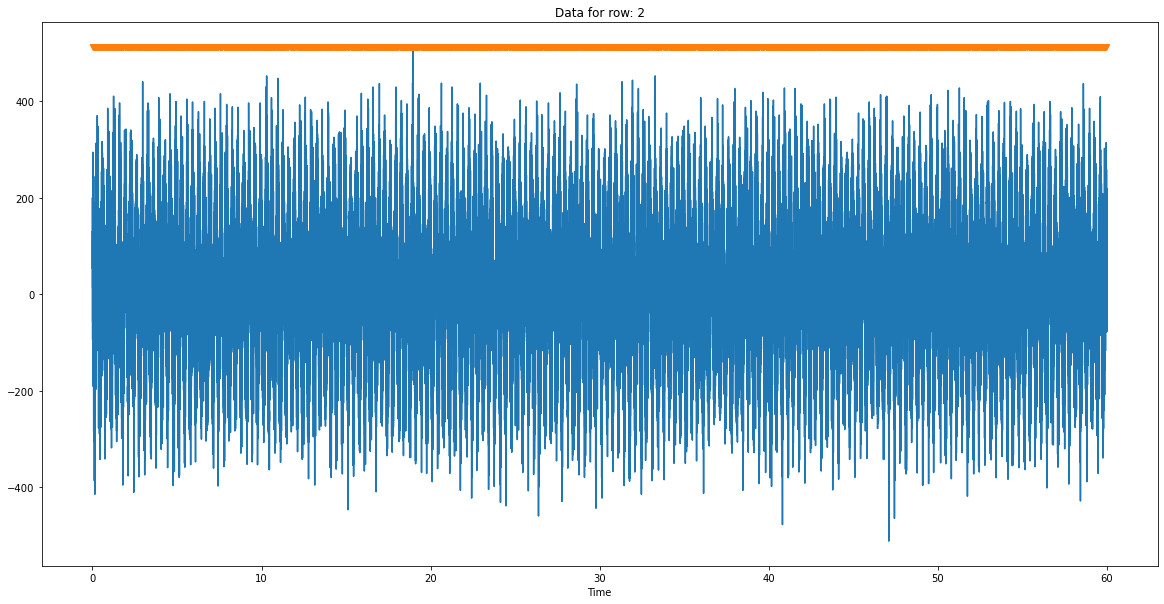

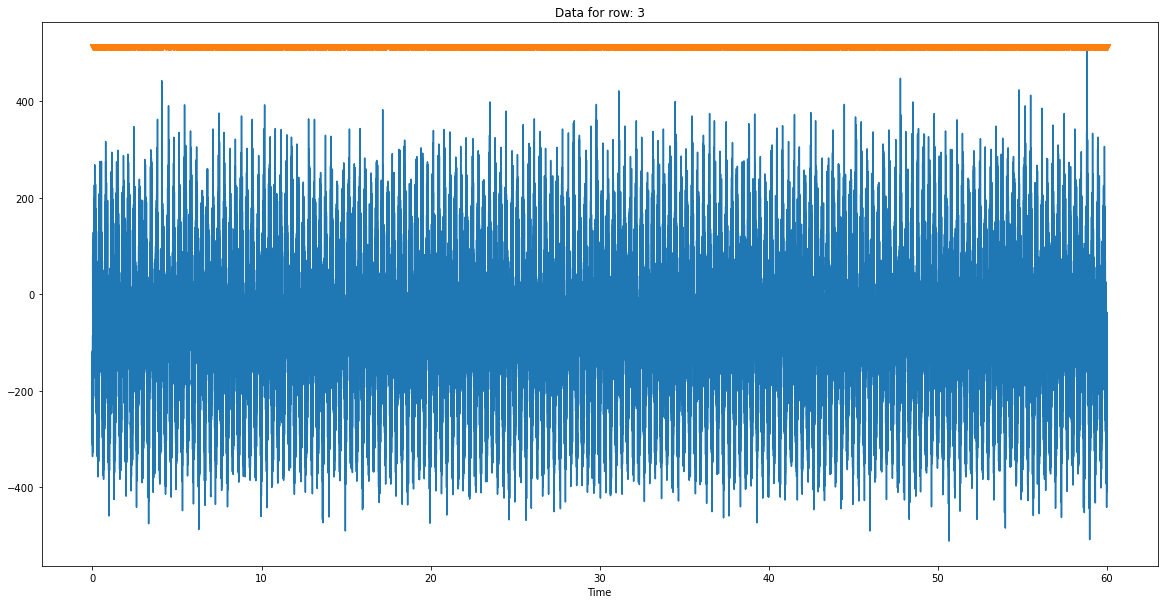

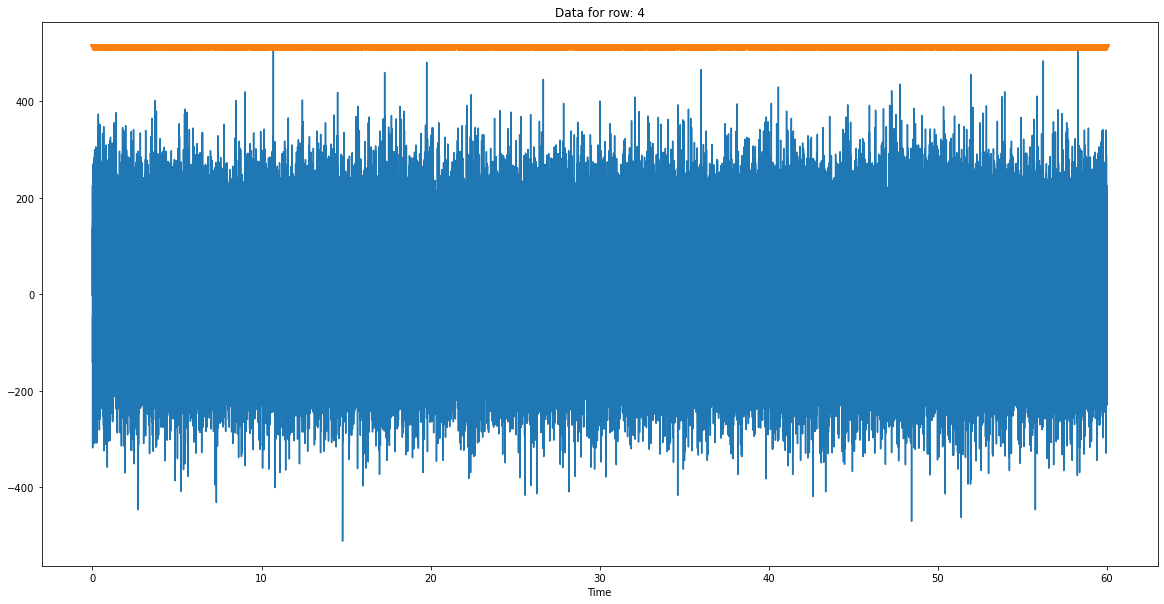

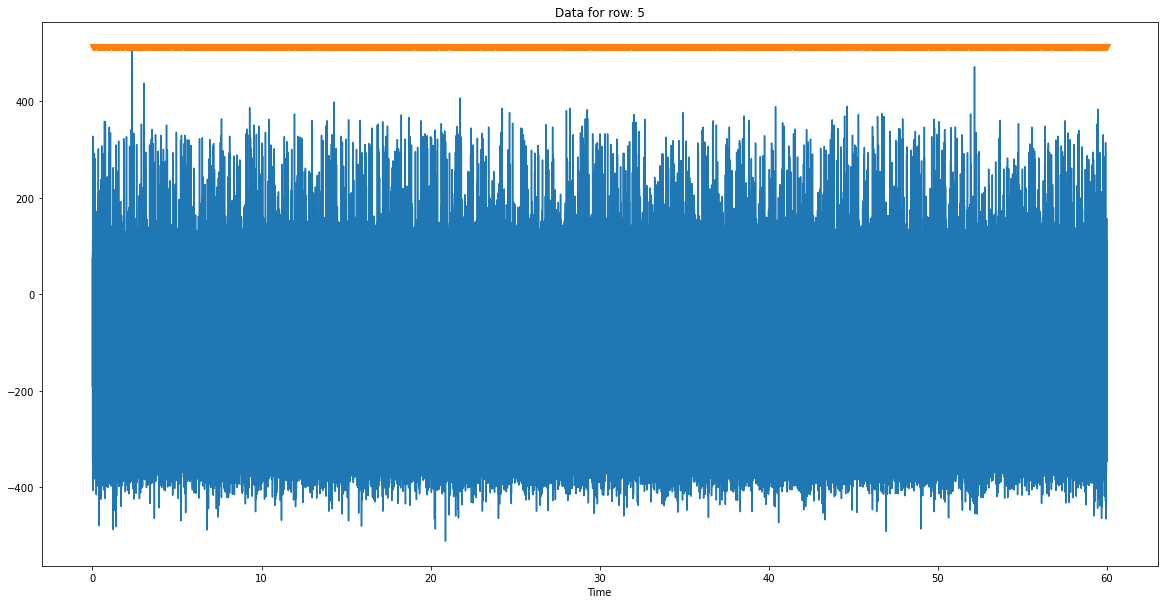

In [29]:
for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]

    plt.plot(t, samples)
    plt.plot(t, spikes, 'v')
    plt.xlabel("Time")
    plt.title("Data for row: "+ str(row_to_plot))
    plt.show()

This reveals nothing significant, so I need to dig deeper and see for ~2000 or so samples

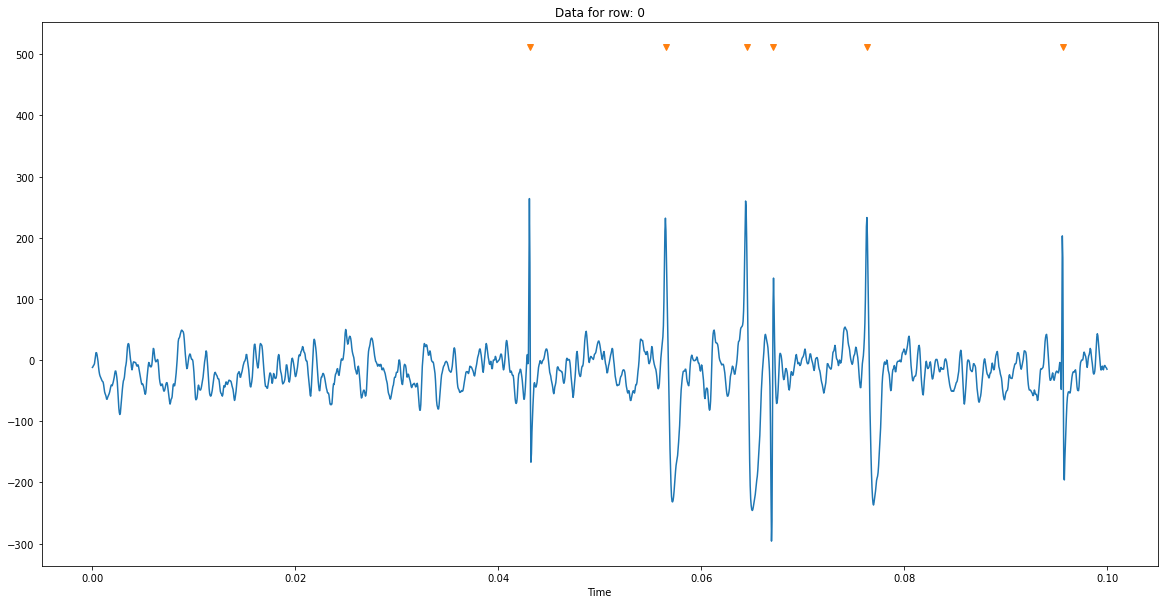

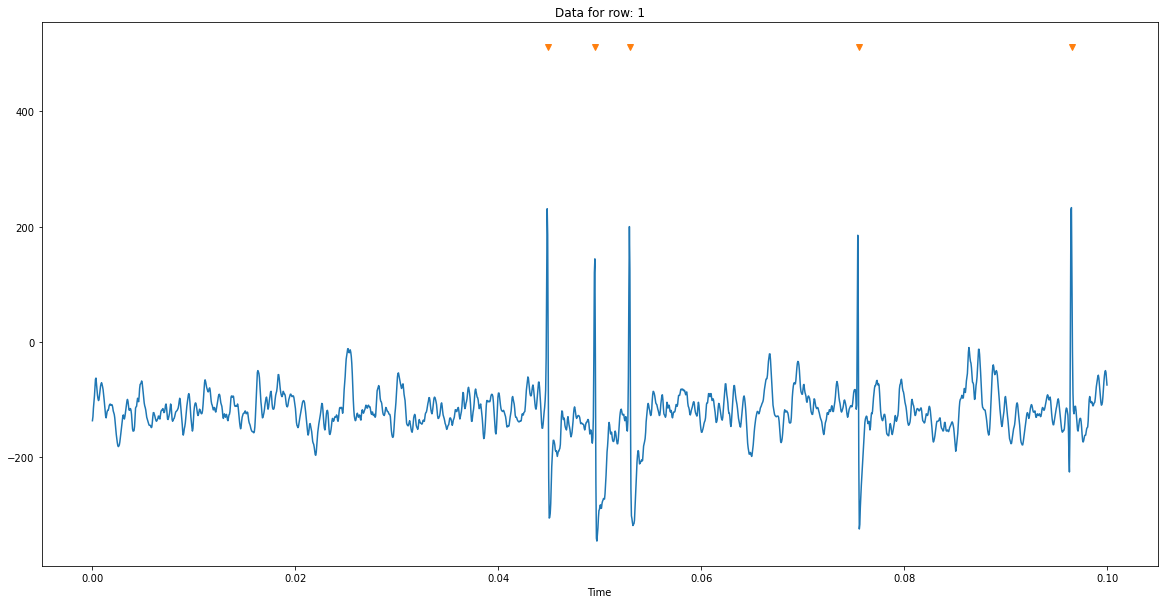

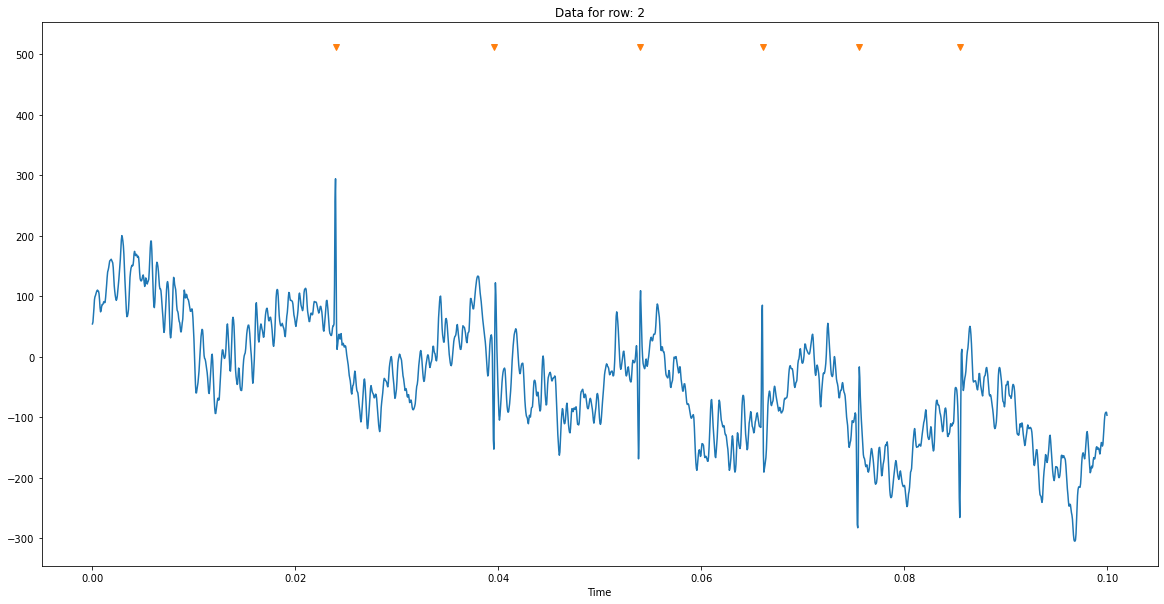

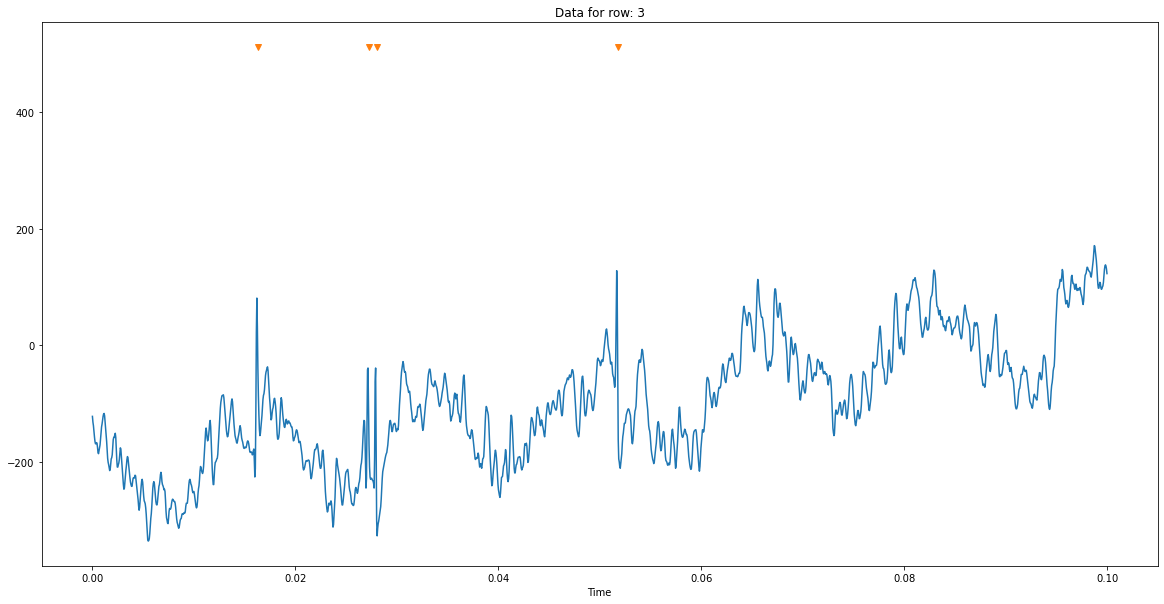

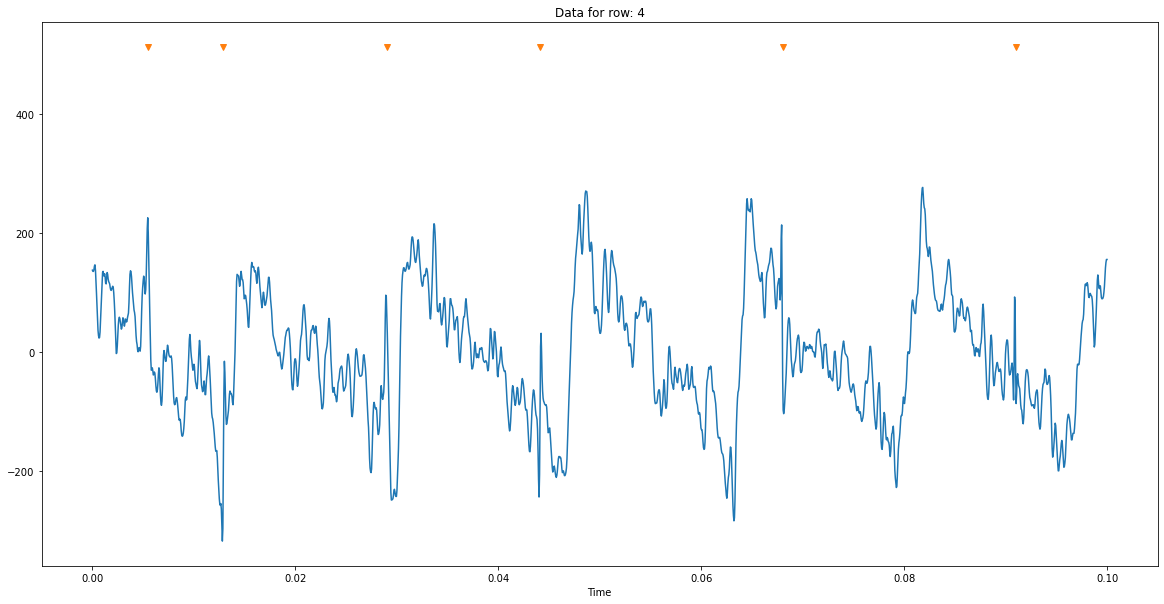

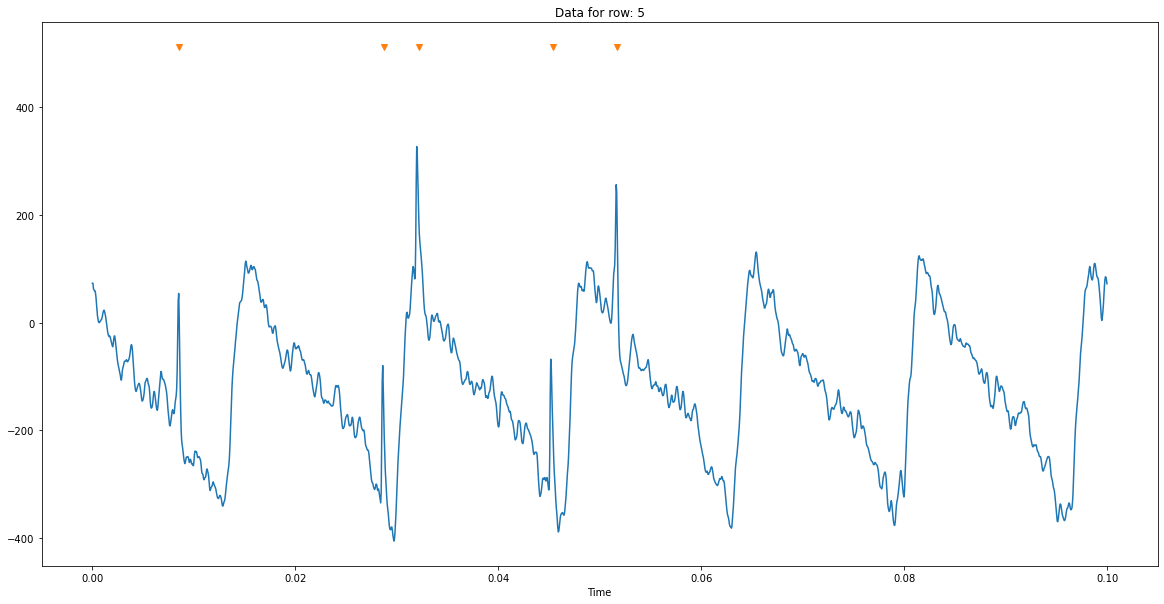

In [31]:
to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]

    plt.plot(t[:to_plot], samples[:to_plot])
    plt.plot(t[:to_plot], spikes[:to_plot], 'v')
    plt.xlabel("Time")
    plt.title("Data for row: "+ str(row_to_plot))
    plt.show()

Okay. This looks interesting. Right out of the bat, I can see that the data gets noisier with every row.

Observations from the data:

1. There seem to be some sort of frequency overlays on top of the data.
2. From visual inspection, I can clearly see that row 4 and 5 have a frequency of roughly 25 Hz dominating.
3. Similarly, rows 2 and 3 have something that looks like the 60Hz noise.
4. These noises can be removed by notch filters

I need to see the FFT to get a better idea of what's going on.

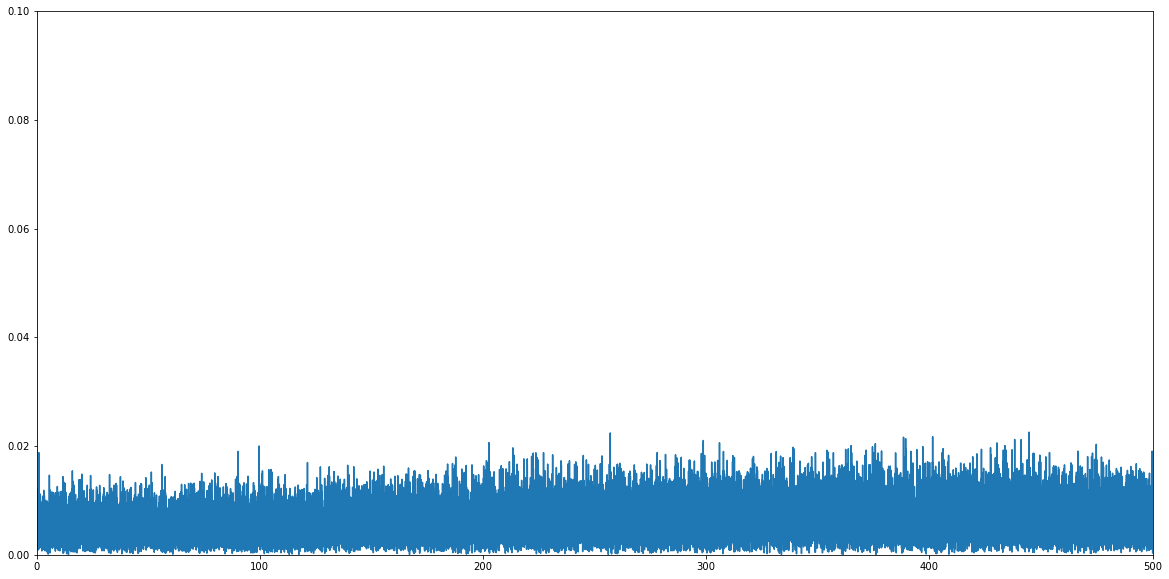

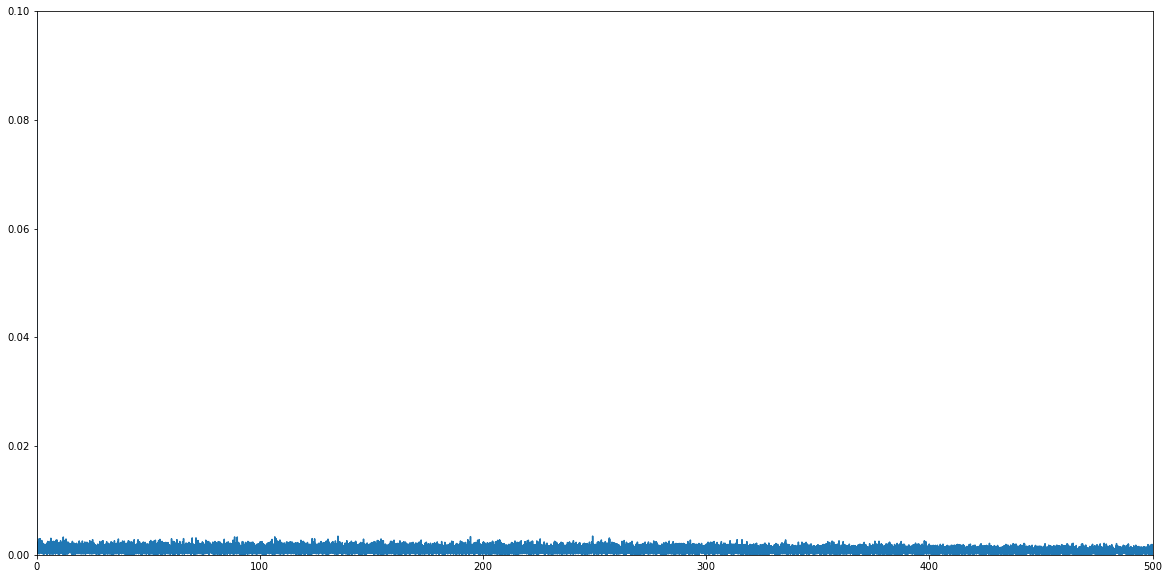

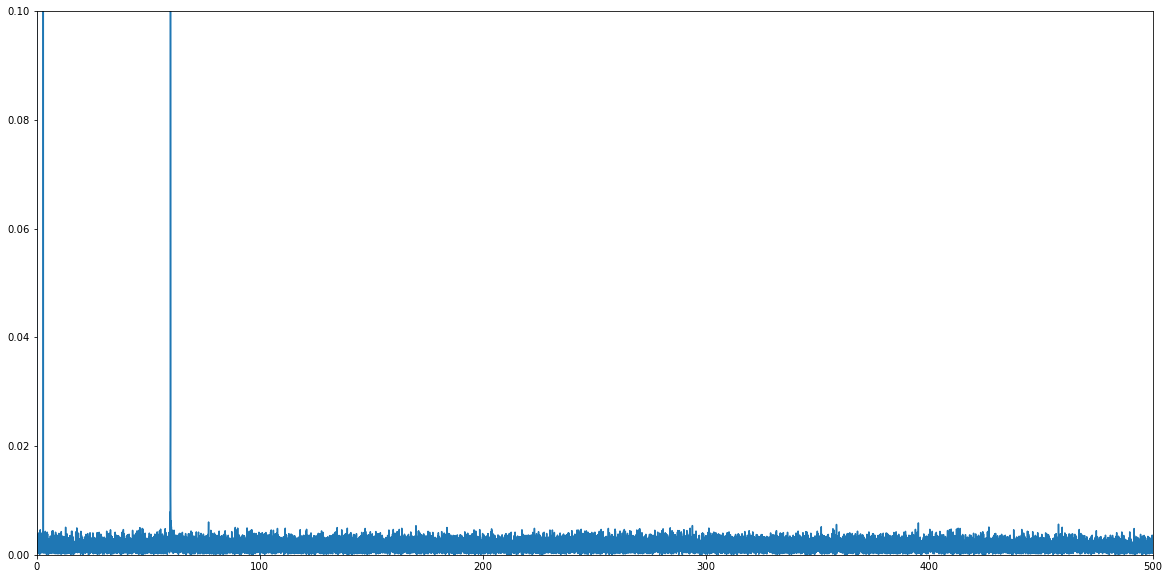

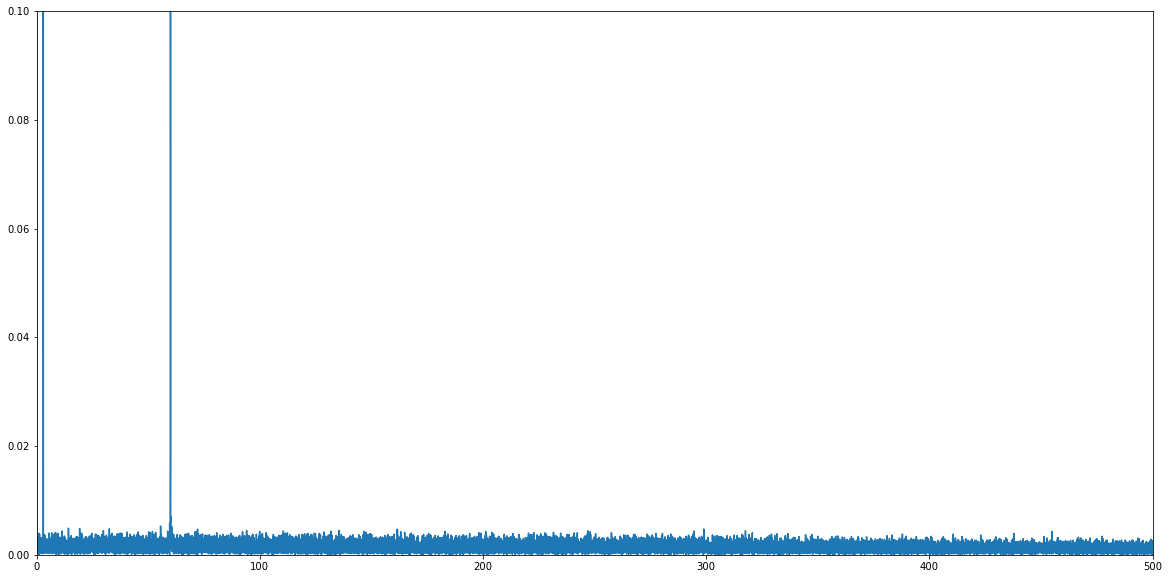

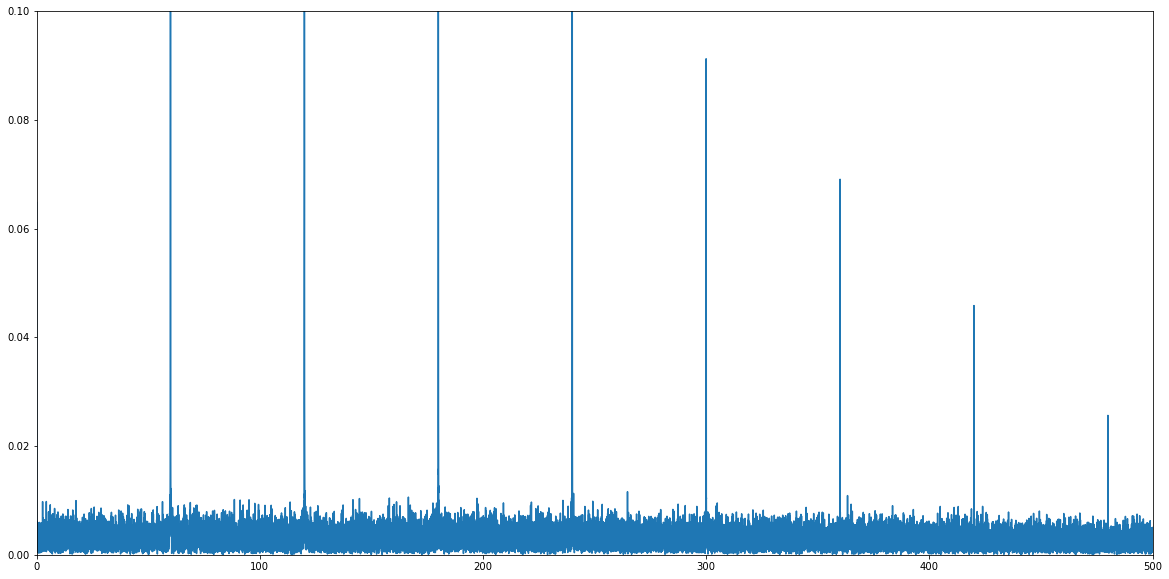

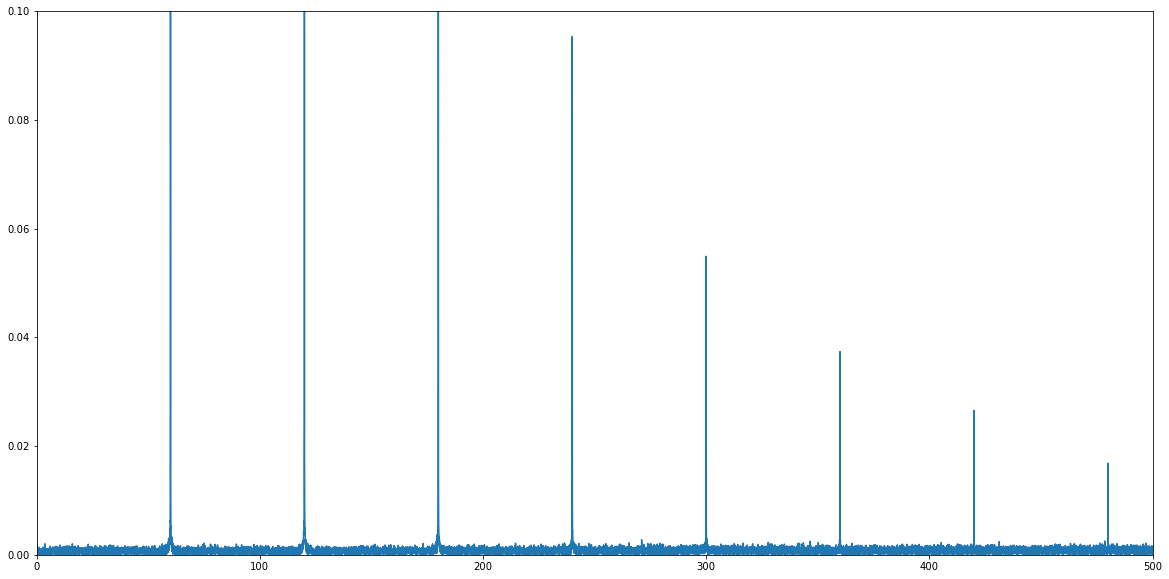

In [42]:
from scipy.fft import rfft, rfftfreq
import numpy as np

to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    yf = rfft(samples)
    xf = rfftfreq(len(samples), 1 / 20000)

    plt.plot(xf, np.abs(yf)/max(np.abs(yf)))
    plt.ylim(0,0.1)
    plt.xlim(0,500)
    plt.show()

Okay, so upon multiple iterations of zooming in and seeing the peaks in frequencies, it looks like there are repeated harmonics of some frequency. Which seems to be 60Hz. To be sure, I want to plot this with xticks

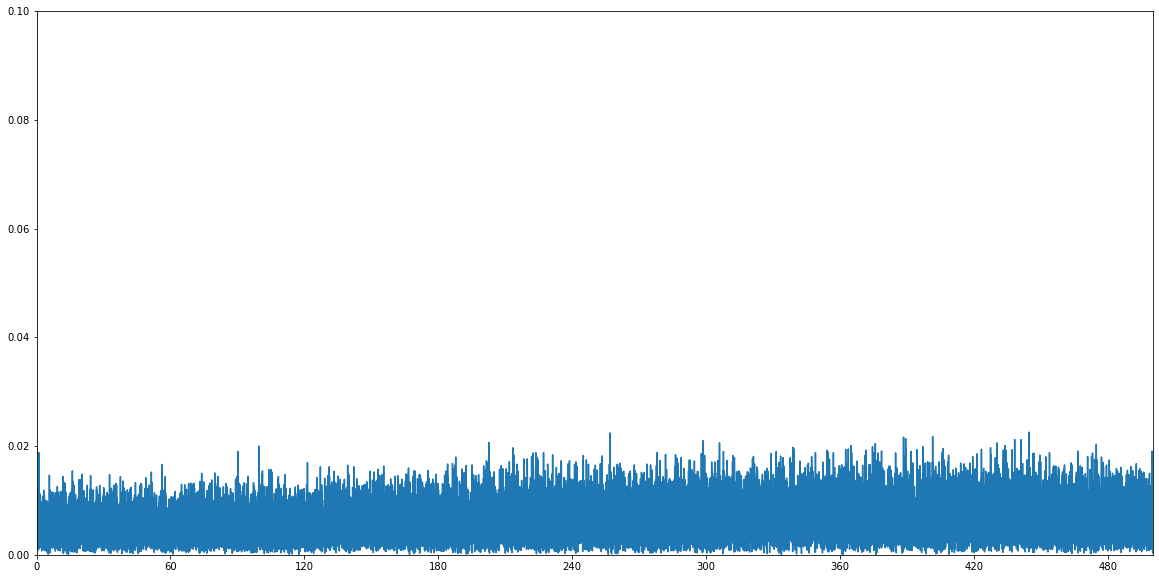

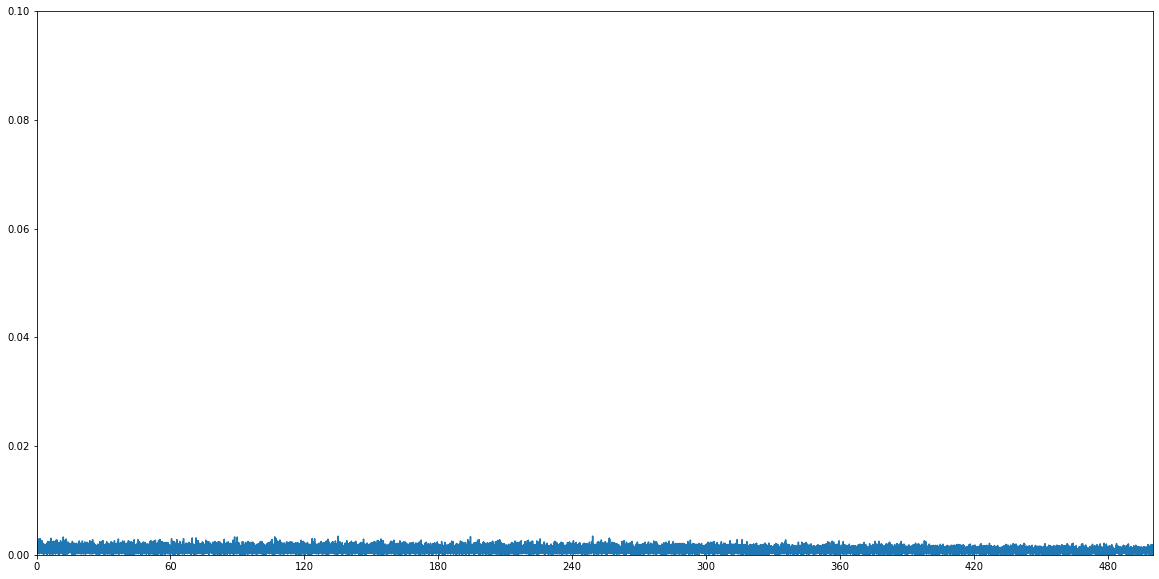

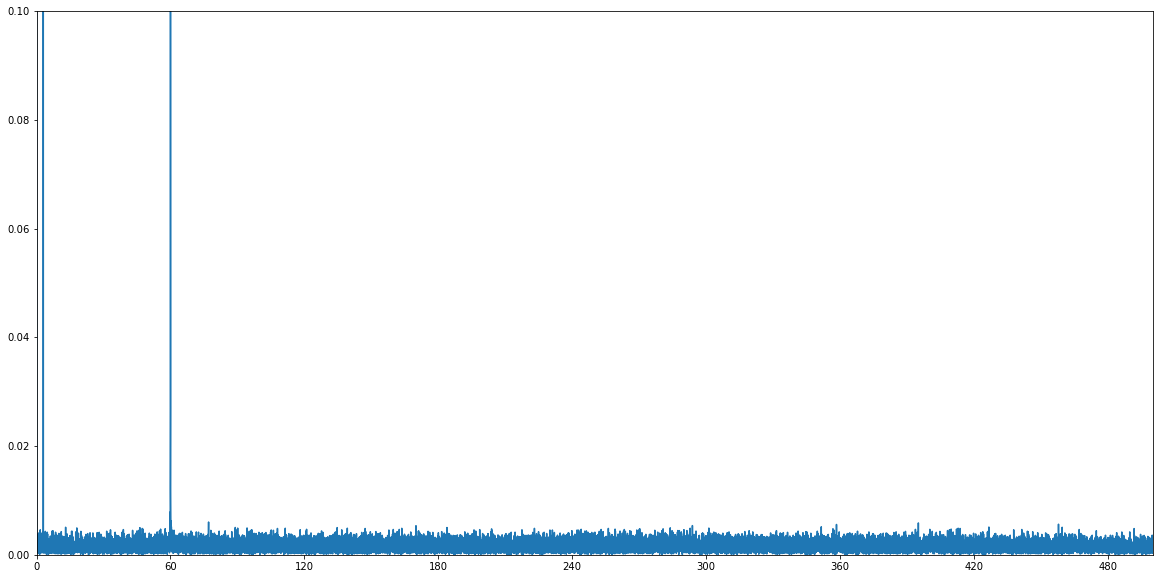

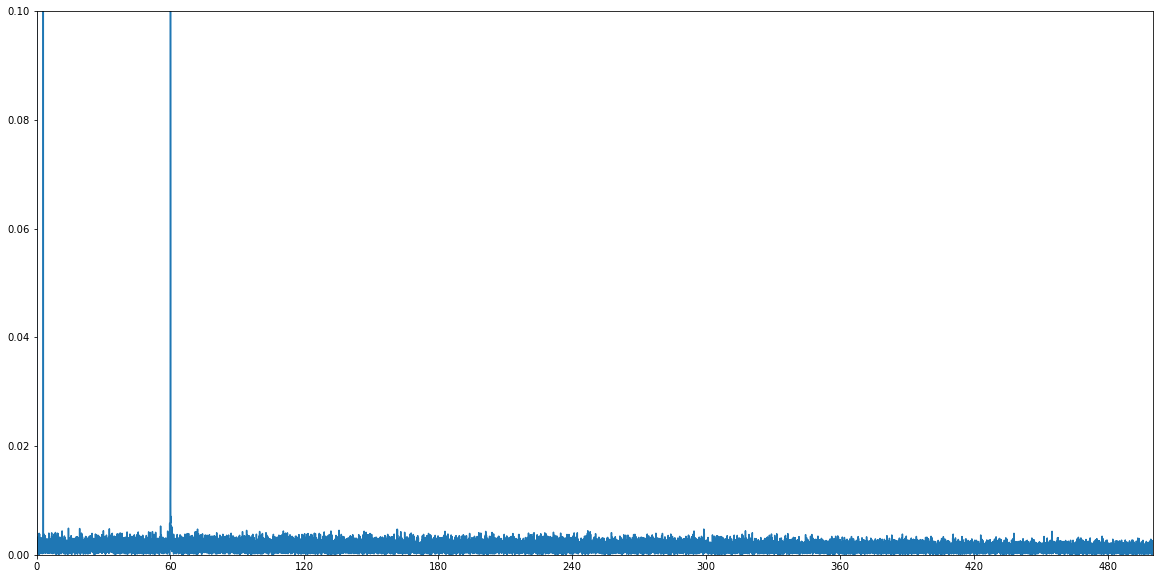

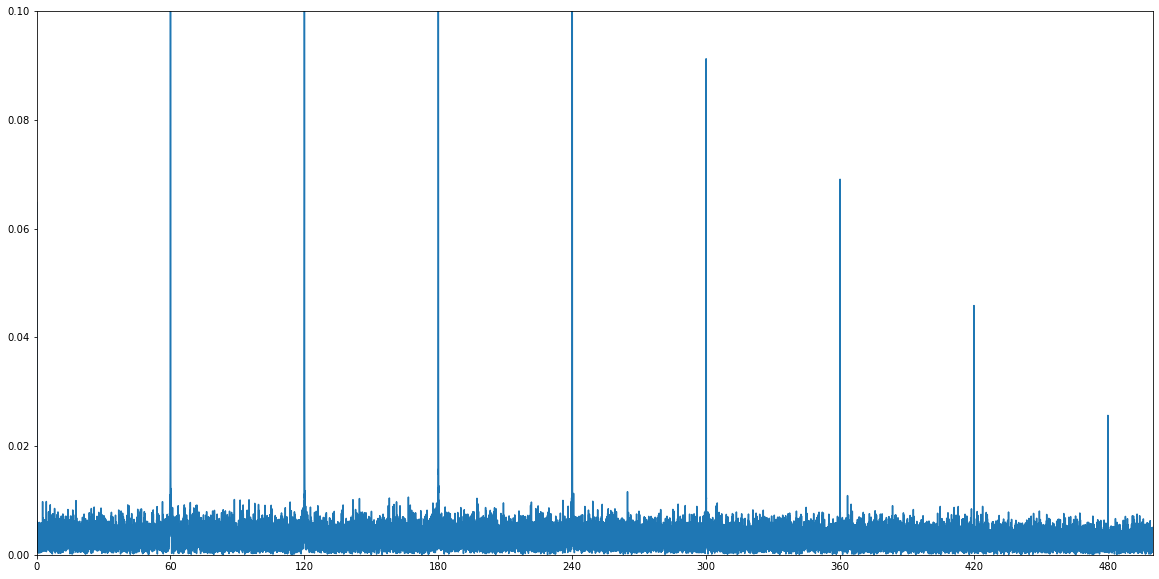

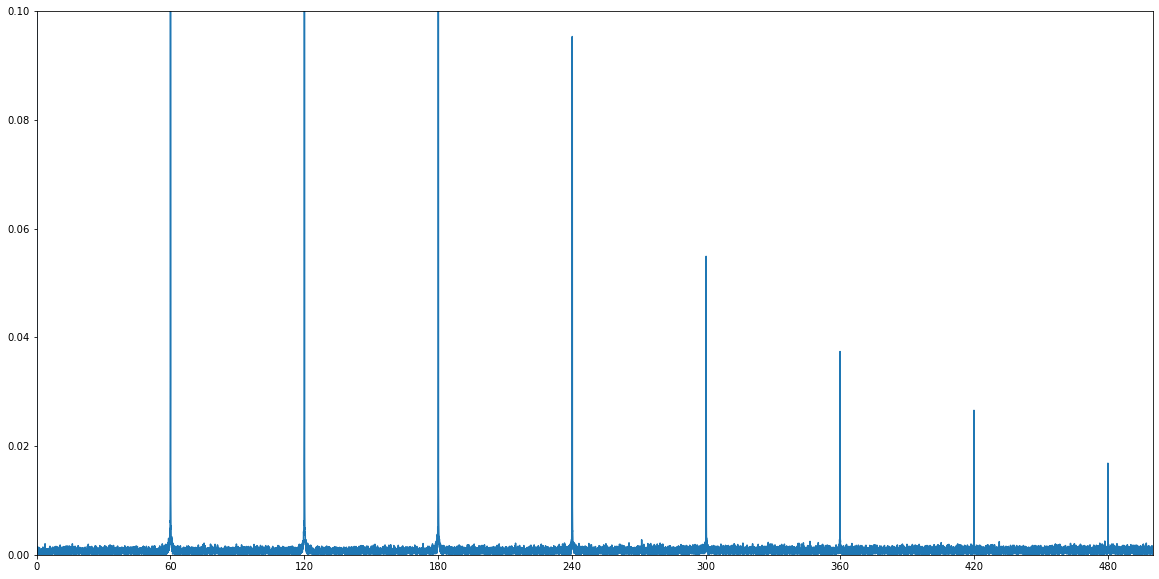

In [44]:
from scipy.fft import rfft, rfftfreq
import numpy as np

to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    yf = rfft(samples)
    xf = rfftfreq(len(samples), 1 / 20000)

    plt.plot(xf, np.abs(yf)/max(np.abs(yf)))
    plt.ylim(0,0.1)
    plt.xlim(0,500)
    plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480])
    plt.show()

Aha! Then there needs to be a notch filter for 60Hz and it's harmonics. That should clear up a lot of the noise. There is also the indication that none of these frequency peaks correspond to the peaks that we need, because the cleanest signal from row 1 has no peaks at these frequencies.

Let's begin by designing iirnotch filters and applying them to the data.

In [54]:
from scipy.signal import butter, sosfiltfilt, filtfilt, iirnotch
from scipy.fft import fft, fftfreq

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b = butter(order, [low, high], btype='band', output='sos')
    return b

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b= butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfiltfilt(b, data)
    return y

def butter_lowpass(freq, fs, order=5):
    nyq = 0.5 * fs
    freq = freq / nyq
    b = butter(order, freq, btype='low', output='sos')
    return b

def butter_lowpass_filter(data, freq, fs, order=5):
    b= butter_lowpass(freq, fs, order=order)
    y = sosfiltfilt(b, data)
    return y

def butter_highpass(freq, fs, order=5):
    nyq = 0.5 * fs
    freq = freq / nyq
    b = butter(order, freq, btype='high', output='sos')
    return b

def butter_highpass_filter(data, freq, fs, order=5):
    b= butter_highpass(freq, fs, order=order)
    y = sosfiltfilt(b, data)
    return y

def _iirnotch(freq, q, fs):
    b, a = iirnotch(freq, q, fs)
    return b, a

def iirnotch_filter(data, freq, fs):
    q = 30 ## Experiment with various frequencies.
    b, a = _iirnotch(freq, q, fs)
    return filtfilt(b, a, data)

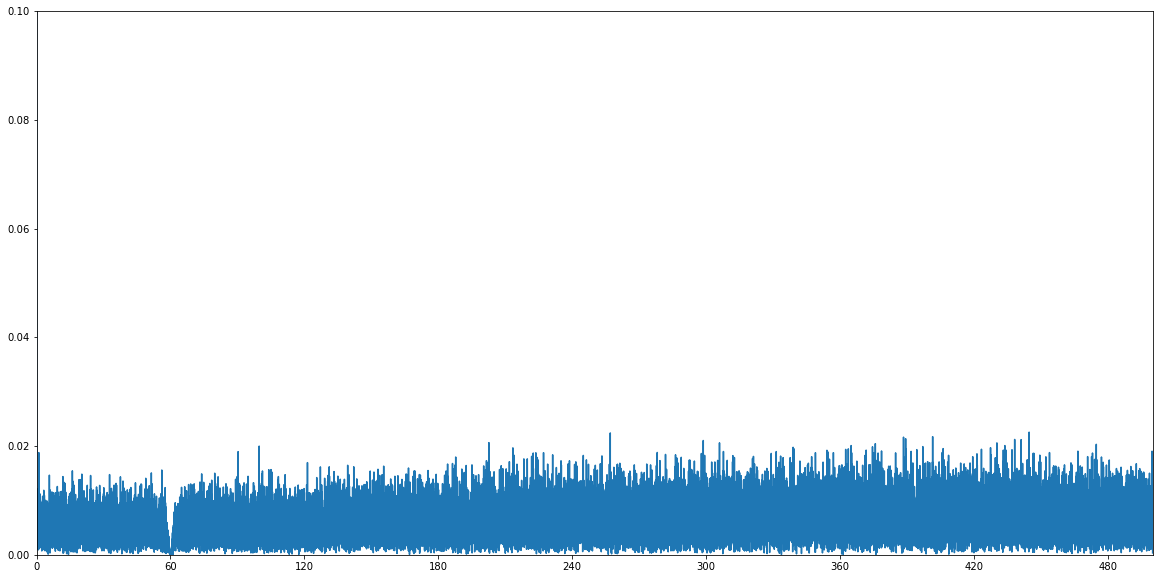

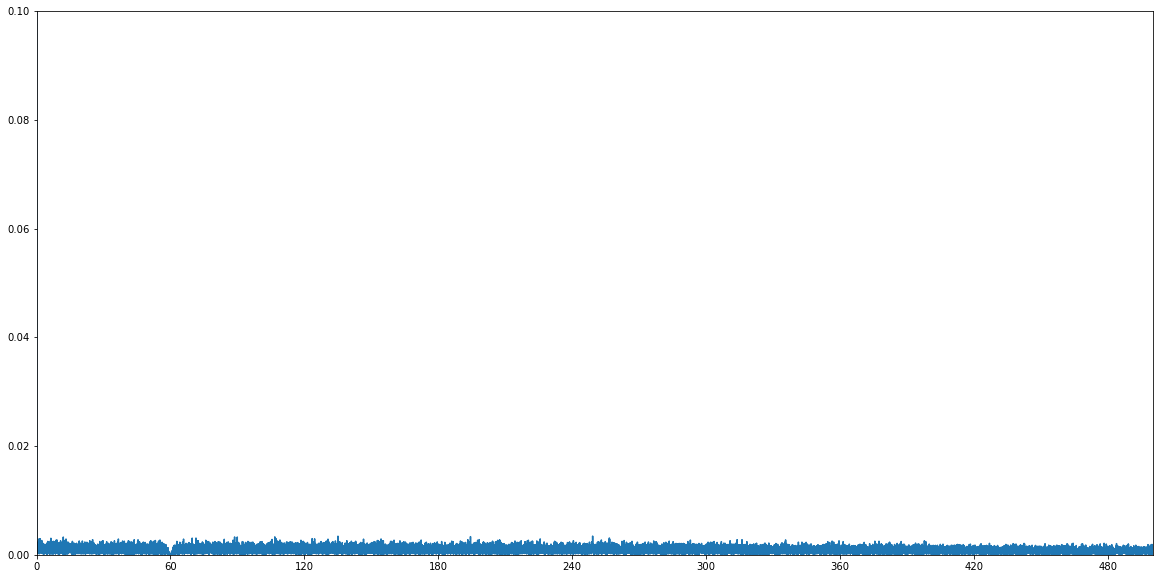

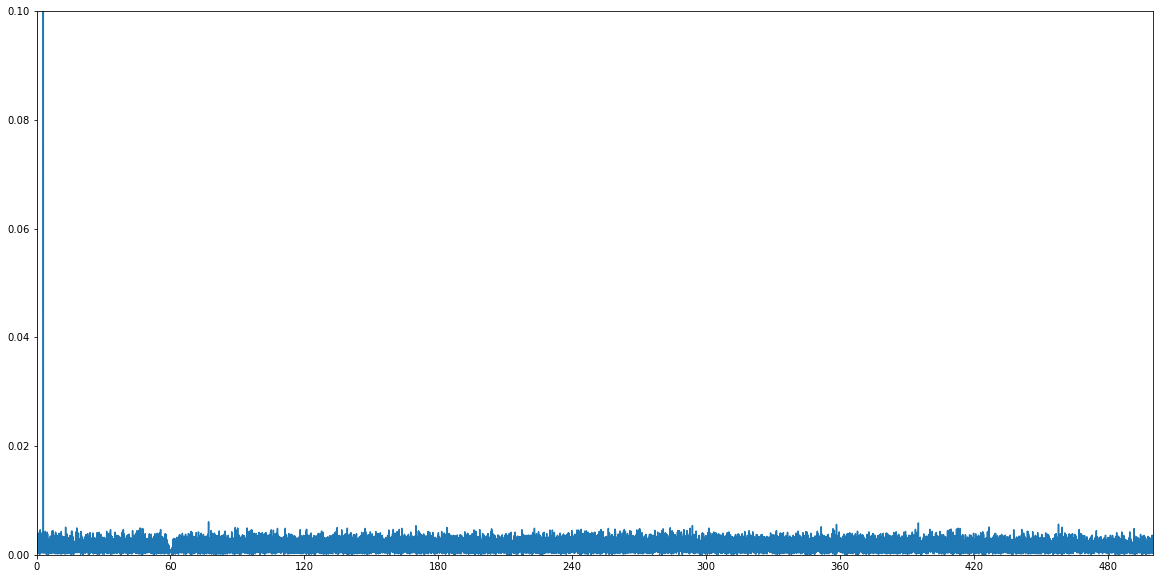

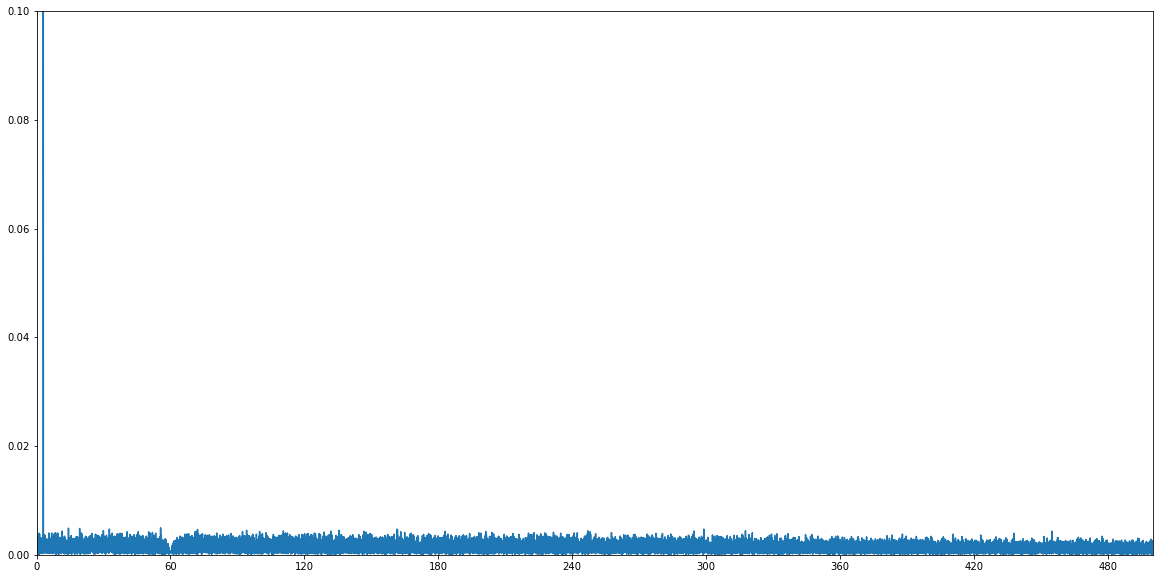

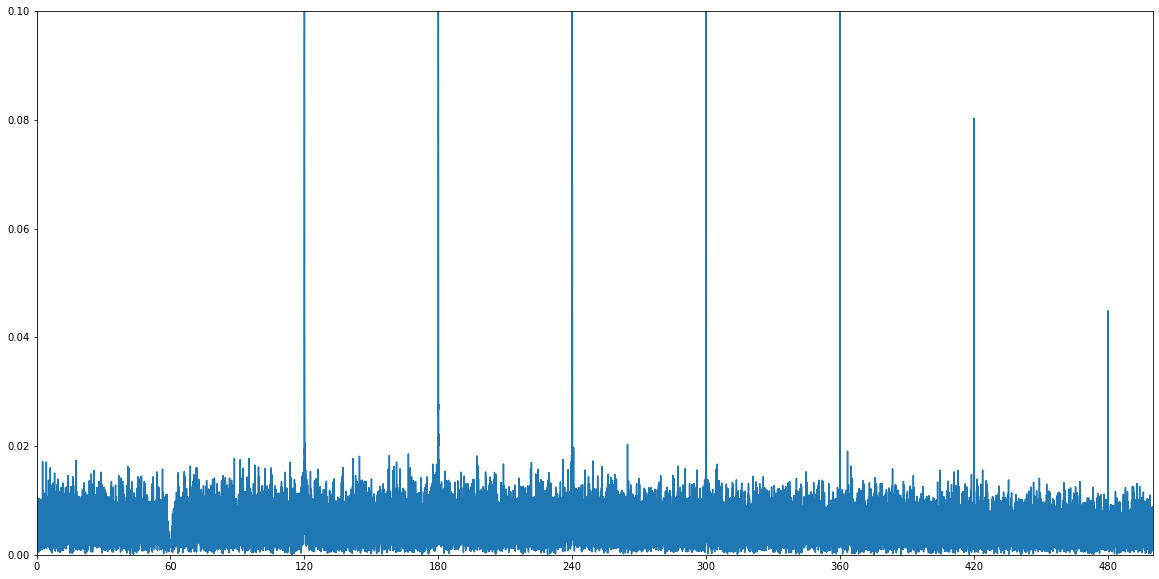

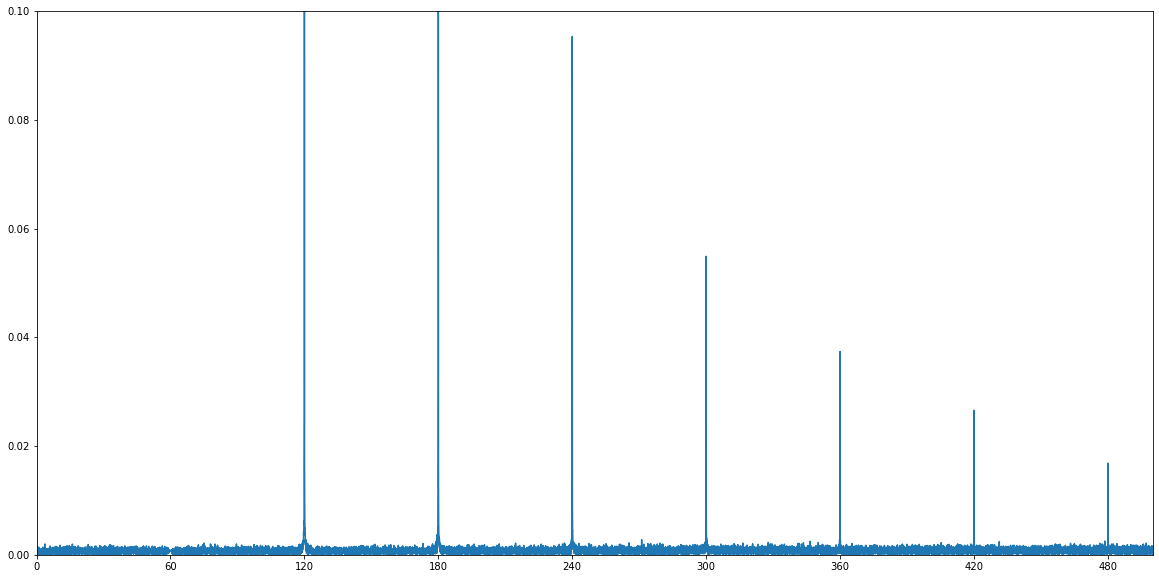

In [47]:
to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    filtered = iirnotch_filter(samples, 60, 20000)
    
    yf = rfft(filtered)
    xf = rfftfreq(len(filtered), 1 / 20000)

    plt.plot(xf, np.abs(yf)/max(np.abs(yf)))
    plt.ylim(0,0.1)
    plt.xlim(0,500)
    plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480])
    plt.show()

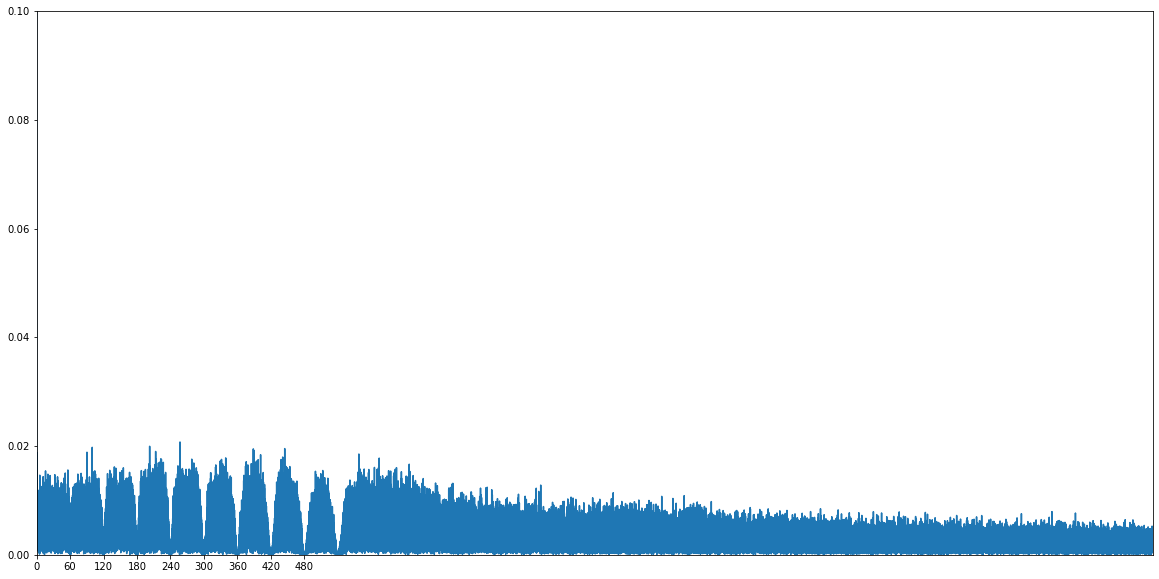

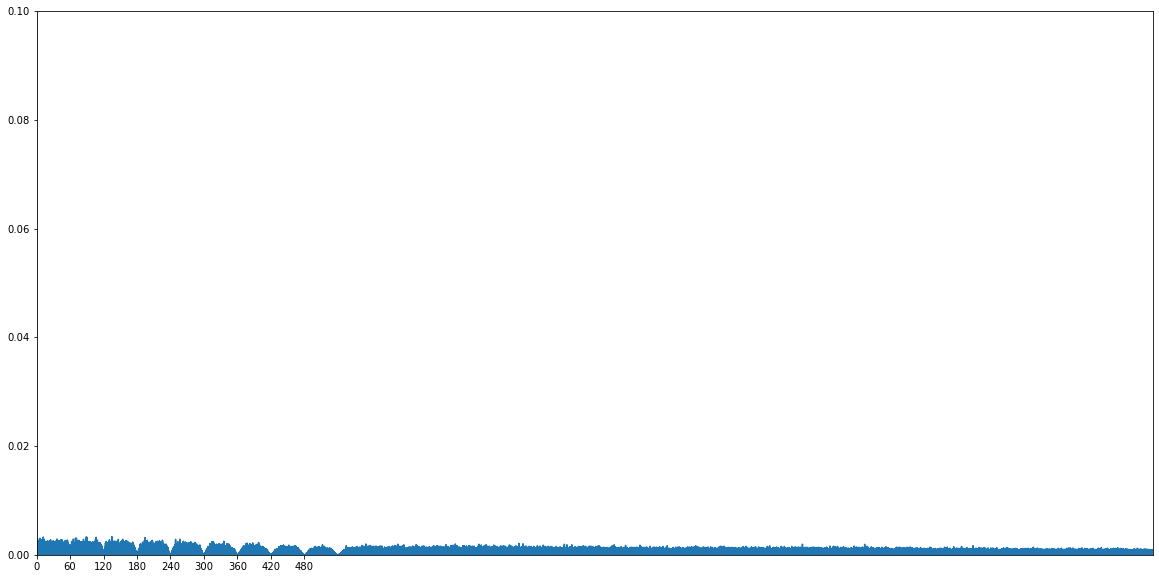

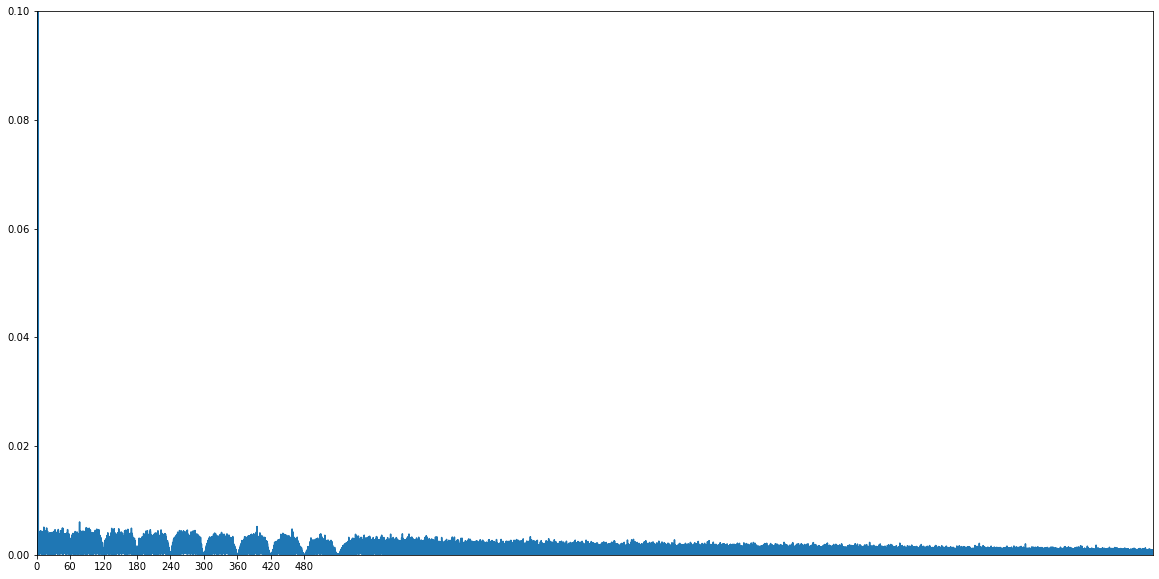

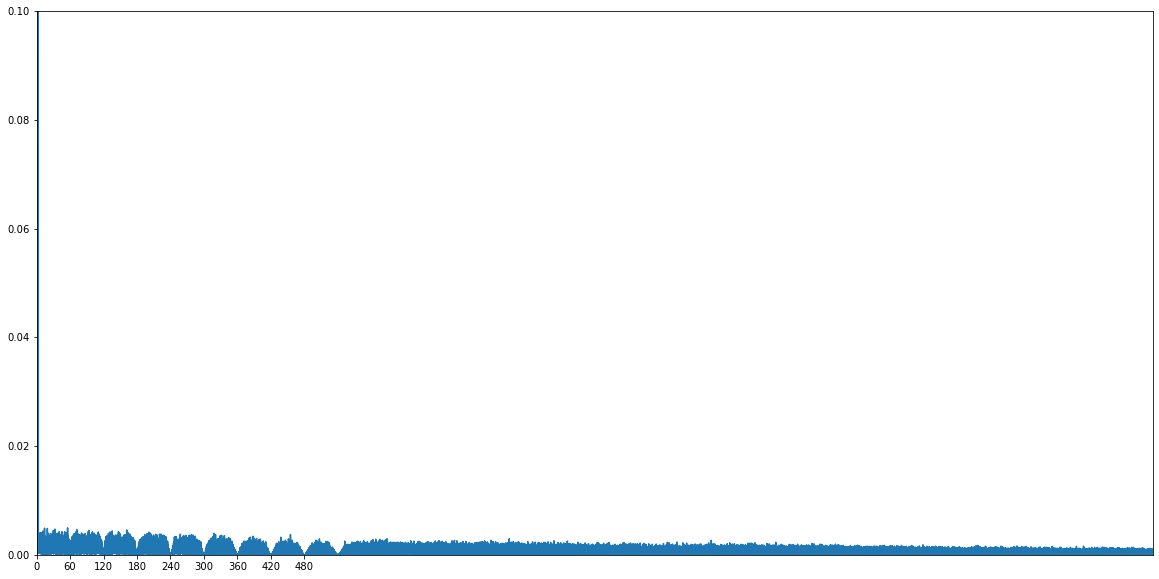

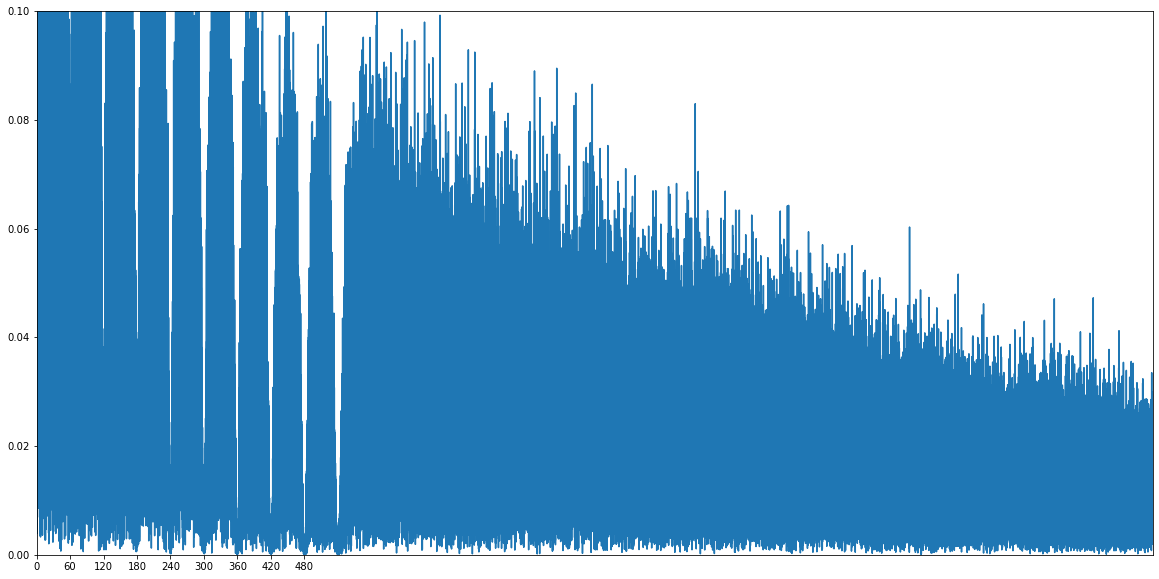

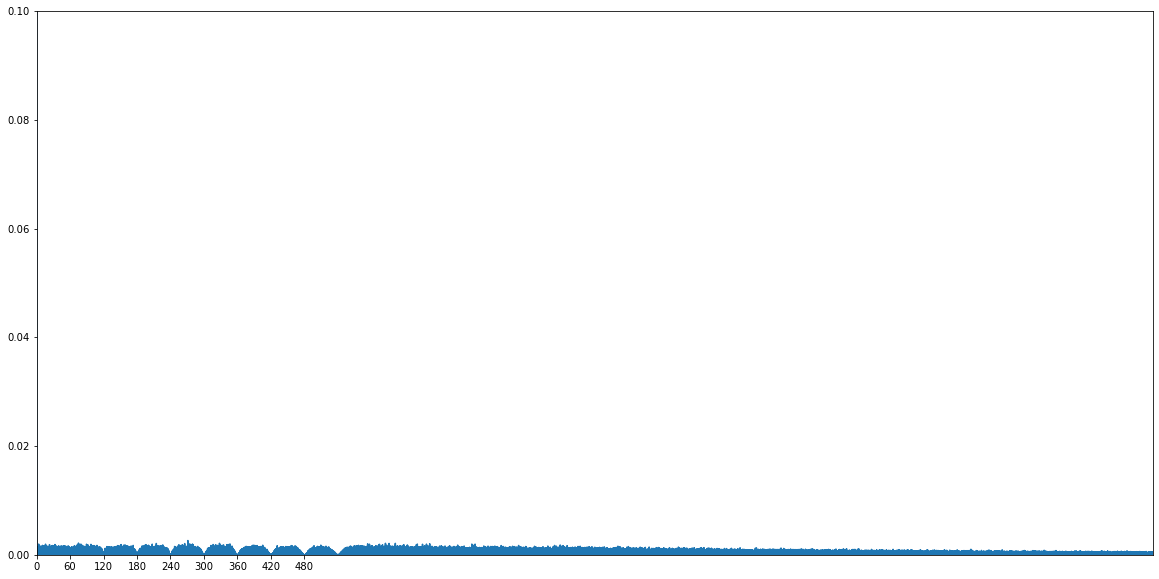

In [50]:
to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    filtered = iirnotch_filter(samples, 60, 20000)
    filtered = iirnotch_filter(filtered, 120, 20000)
    filtered = iirnotch_filter(filtered, 180, 20000)
    filtered = iirnotch_filter(filtered, 240, 20000)
    filtered = iirnotch_filter(filtered, 300, 20000)
    filtered = iirnotch_filter(filtered, 360, 20000)
    filtered = iirnotch_filter(filtered, 420, 20000)
    filtered = iirnotch_filter(filtered, 480, 20000)
    filtered = iirnotch_filter(filtered, 540, 20000)
    
    yf = rfft(filtered)
    xf = rfftfreq(len(filtered), 1 / 20000)

    plt.plot(xf, np.abs(yf)/max(np.abs(yf)))
    plt.ylim(0,0.1)
    plt.xlim(0,2000)
    plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480])
    plt.show()

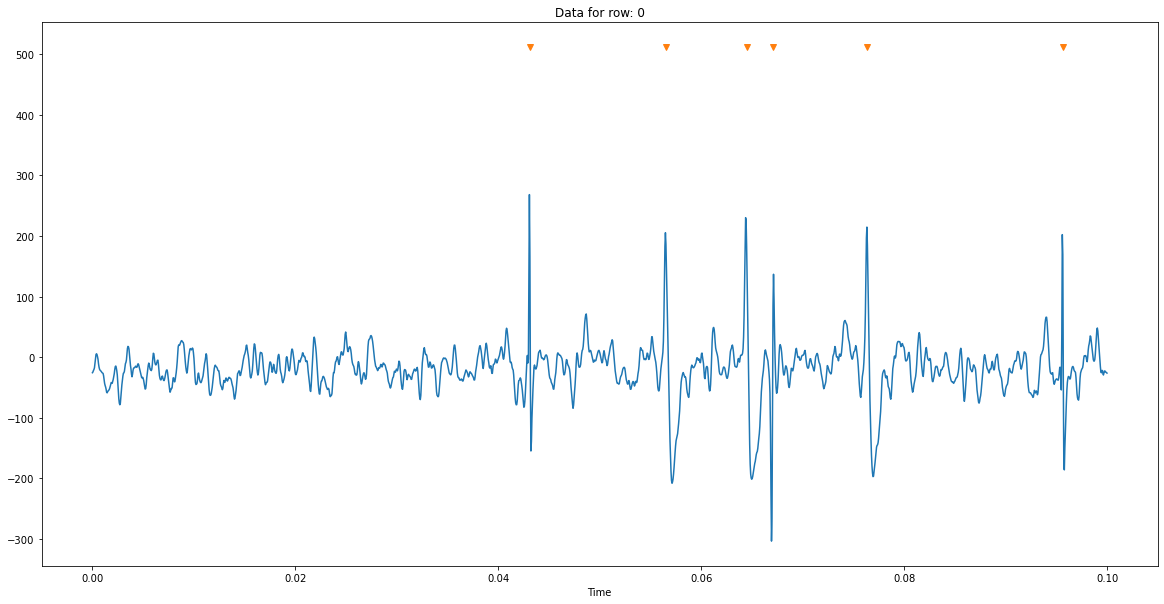

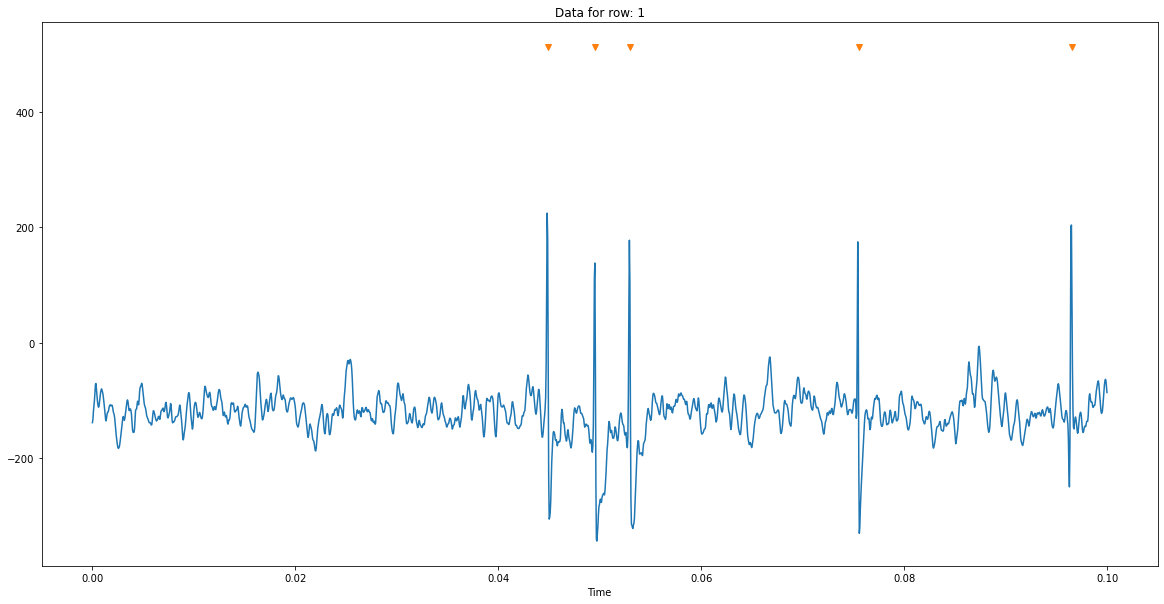

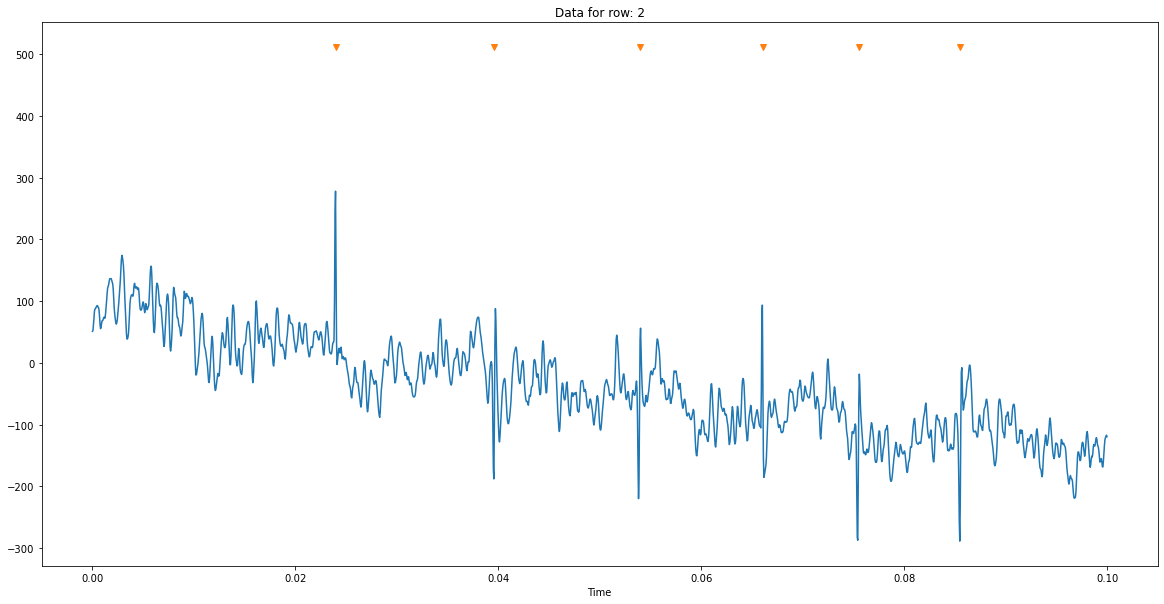

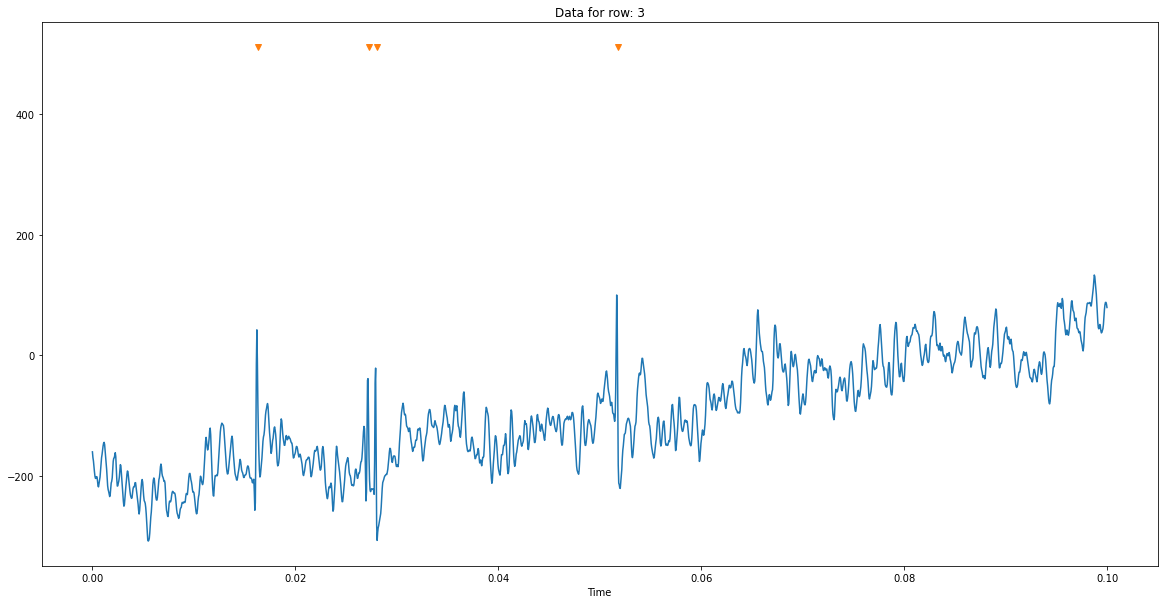

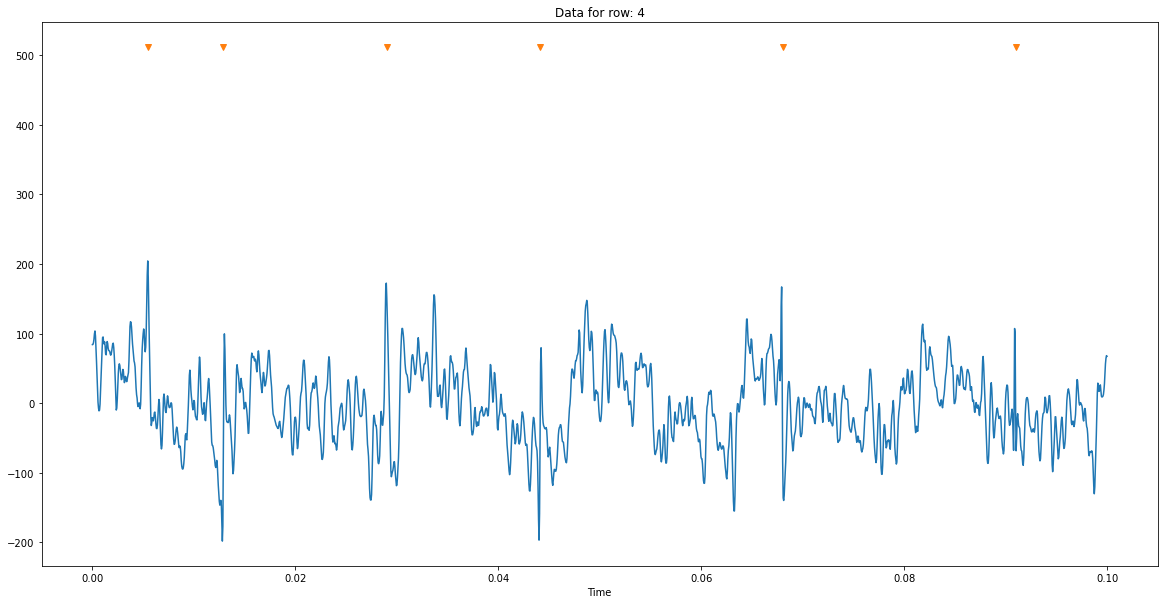

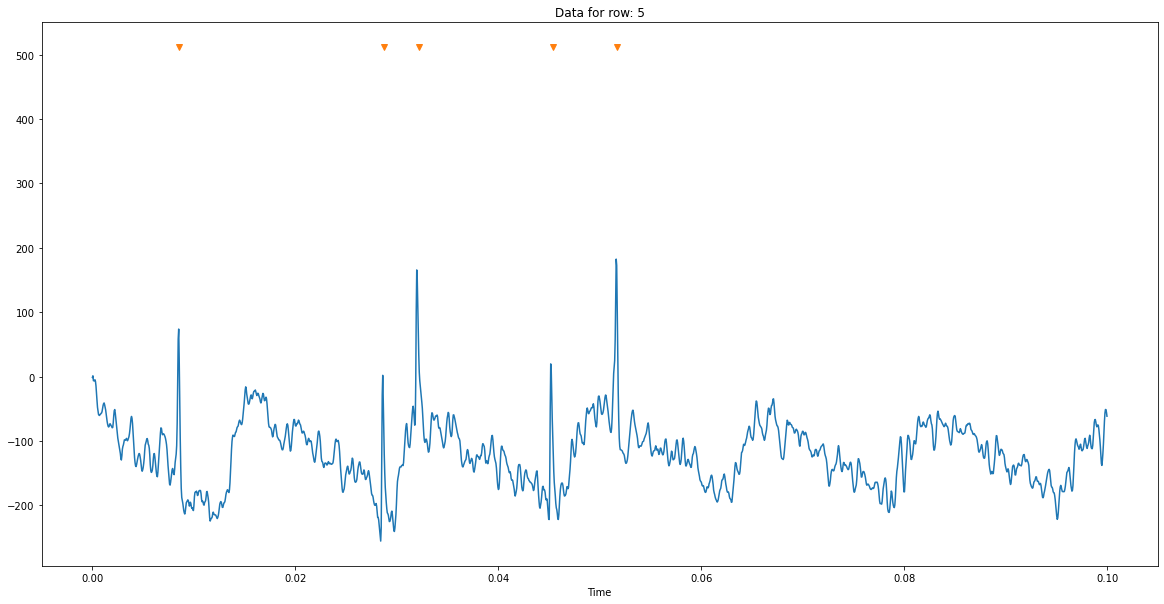

In [51]:
to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    filtered = iirnotch_filter(samples, 60, 20000)
    filtered = iirnotch_filter(filtered, 120, 20000)
    filtered = iirnotch_filter(filtered, 180, 20000)
    filtered = iirnotch_filter(filtered, 240, 20000)
    filtered = iirnotch_filter(filtered, 300, 20000)
    filtered = iirnotch_filter(filtered, 360, 20000)
    filtered = iirnotch_filter(filtered, 420, 20000)
    filtered = iirnotch_filter(filtered, 480, 20000)
    filtered = iirnotch_filter(filtered, 540, 20000)

    plt.plot(t[:to_plot], filtered[:to_plot])
    plt.plot(t[:to_plot], spikes[:to_plot], 'v')
    plt.xlabel("Time")
    plt.title("Data for row: "+ str(row_to_plot))
    plt.show()

There still seems to be a lot of noise. Mostly in the lower frequency spectrum. Also, the peaks seem to be at high frequencies. So the next step is to remove the low frequencies.

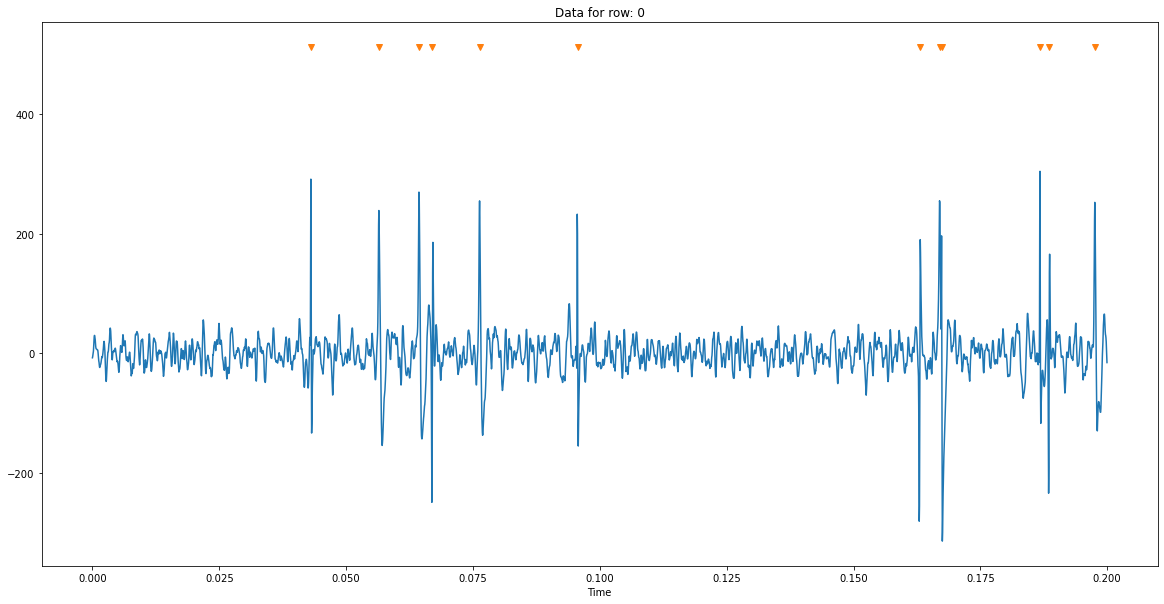

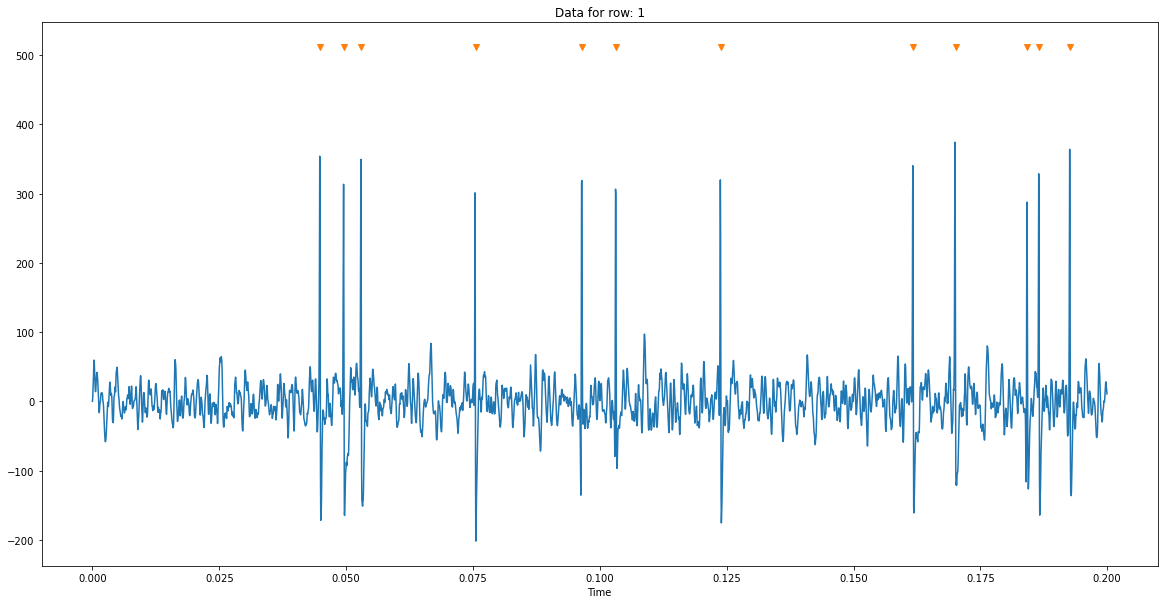

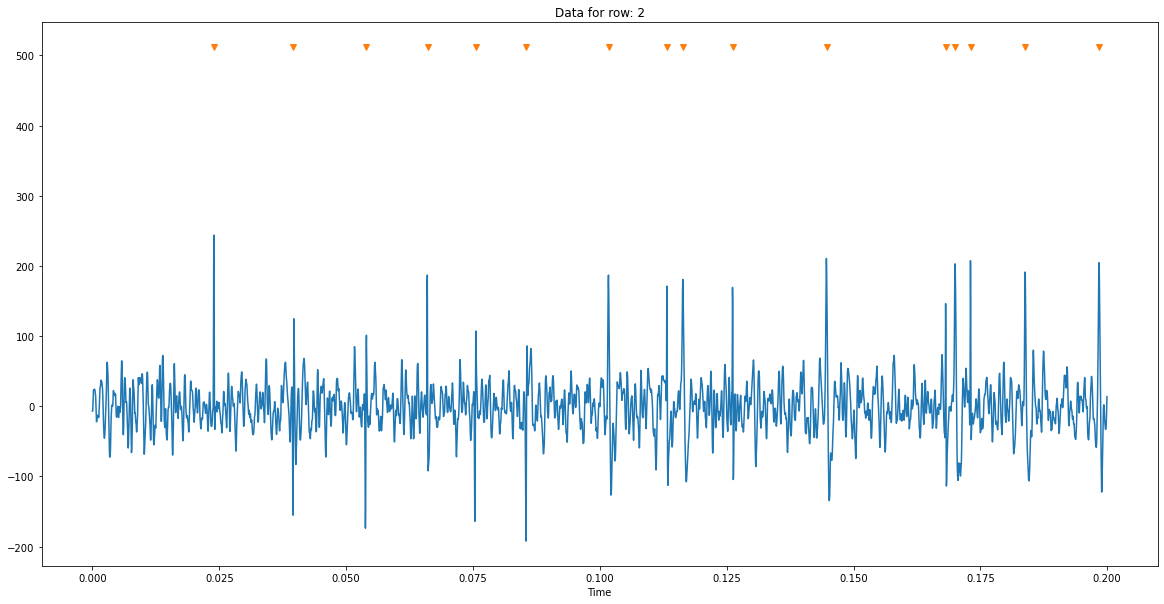

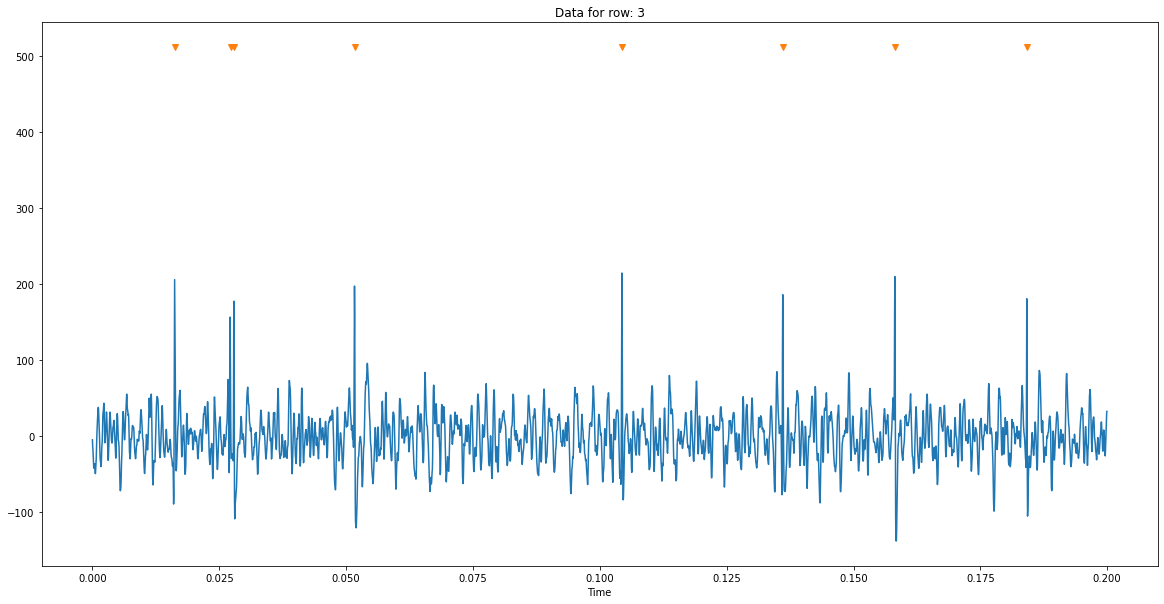

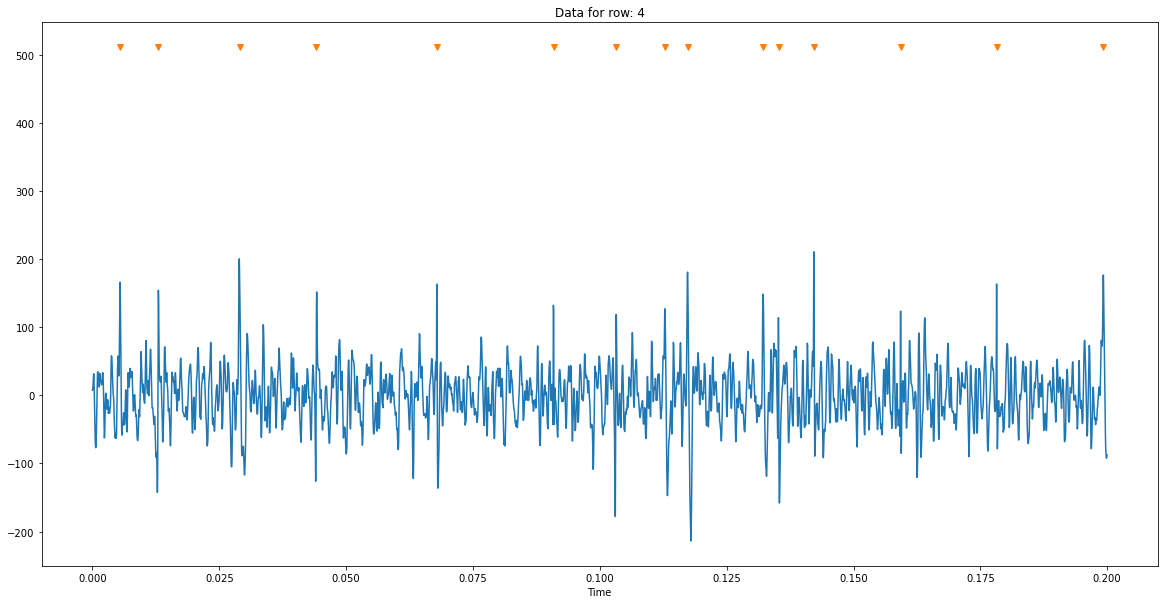

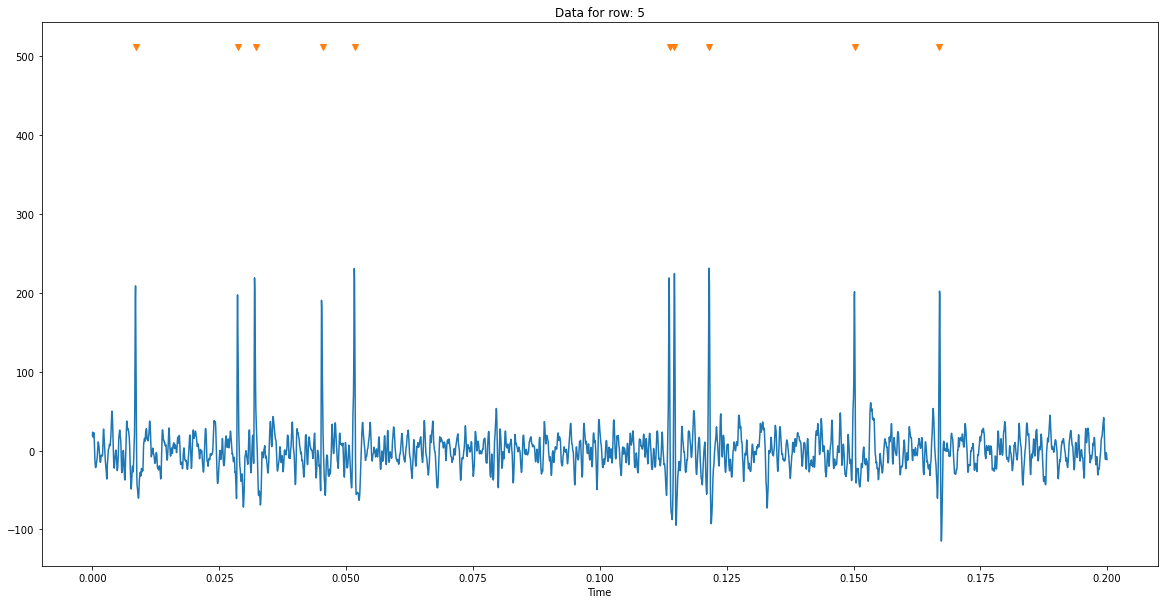

In [59]:
to_plot = 4000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    filtered = butter_highpass_filter(samples, 200, 20000, order=5)
    filtered = iirnotch_filter(filtered, 60, 20000)
    filtered = iirnotch_filter(filtered, 120, 20000)
    filtered = iirnotch_filter(filtered, 180, 20000)
    filtered = iirnotch_filter(filtered, 240, 20000)
    filtered = iirnotch_filter(filtered, 300, 20000)
    filtered = iirnotch_filter(filtered, 360, 20000)
    filtered = iirnotch_filter(filtered, 420, 20000)
    filtered = iirnotch_filter(filtered, 480, 20000)
    filtered = iirnotch_filter(filtered, 540, 20000)

    plt.plot(t[:to_plot], filtered[:to_plot])
    plt.plot(t[:to_plot], spikes[:to_plot], 'v')
    plt.xlabel("Time")
    plt.title("Data for row: "+ str(row_to_plot))
    plt.show()

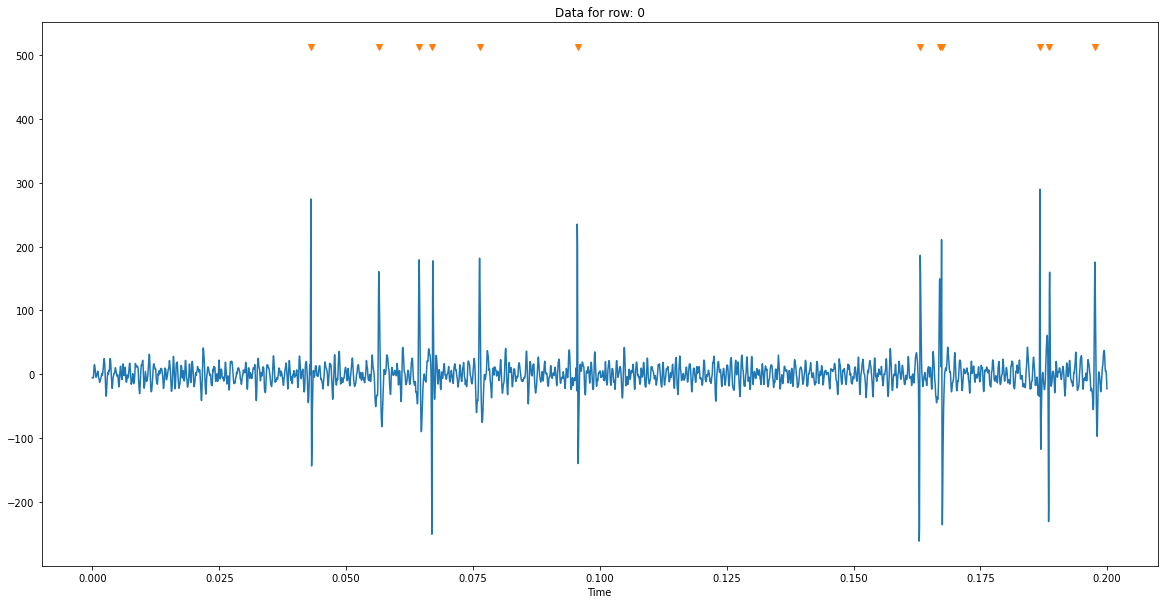

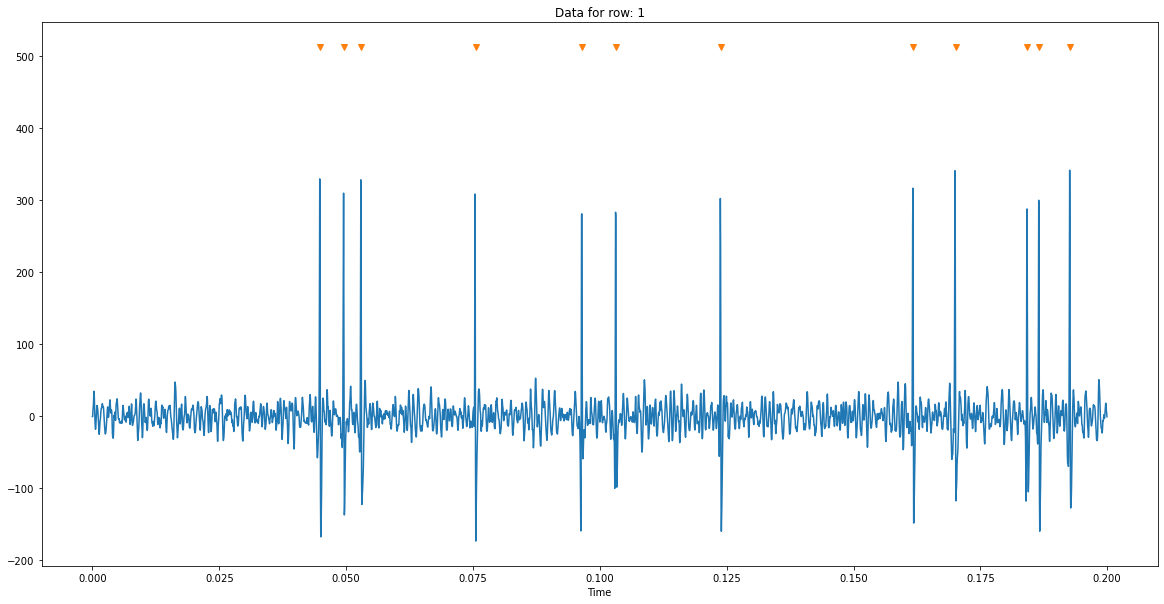

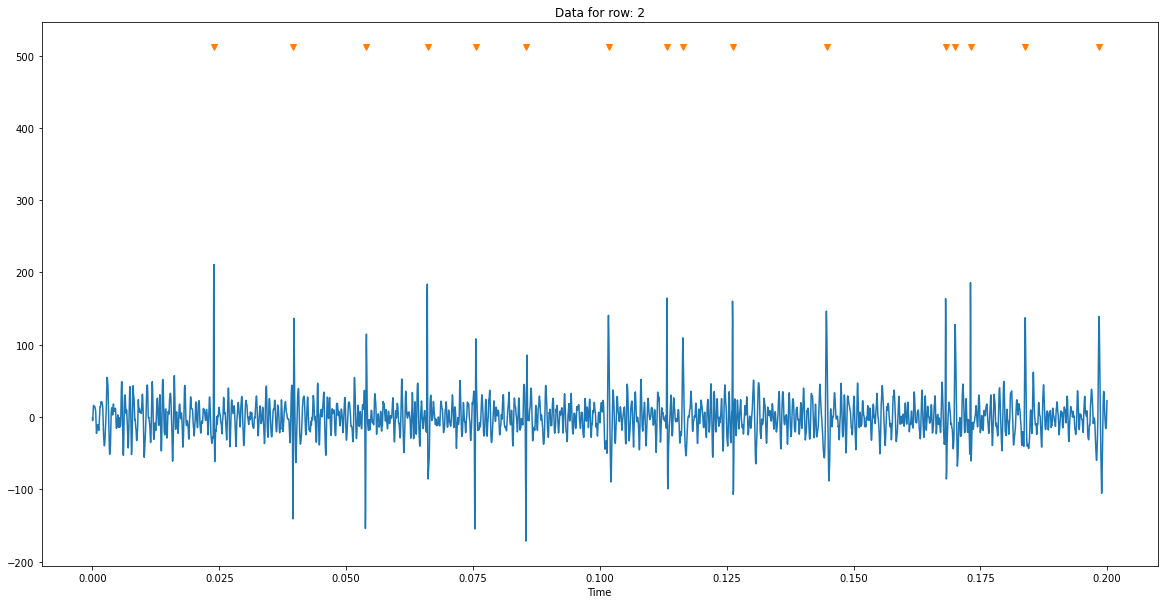

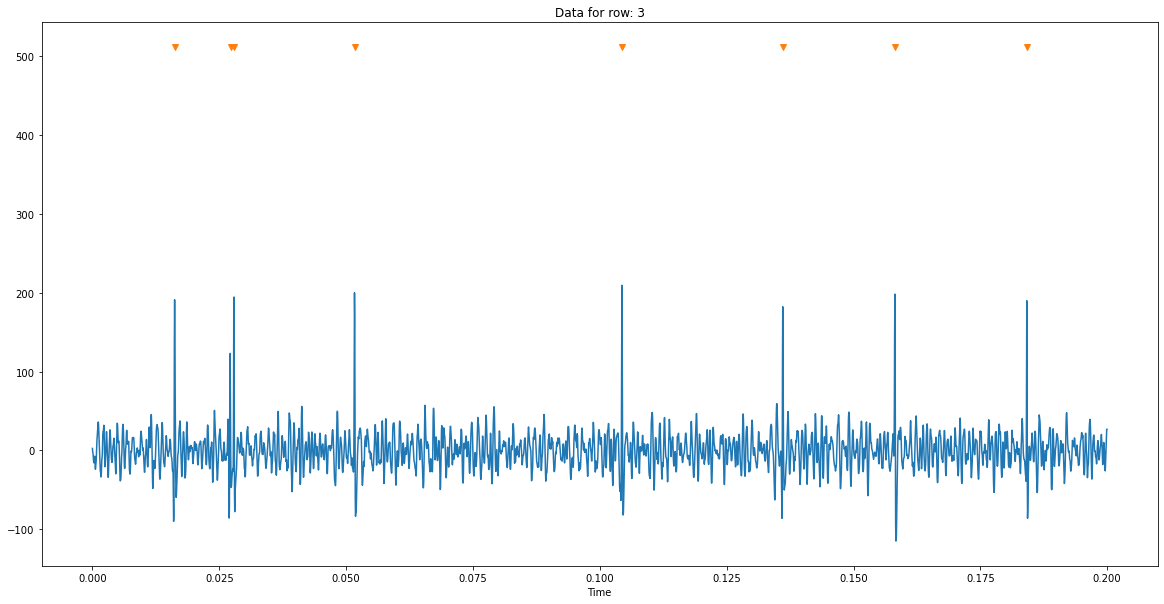

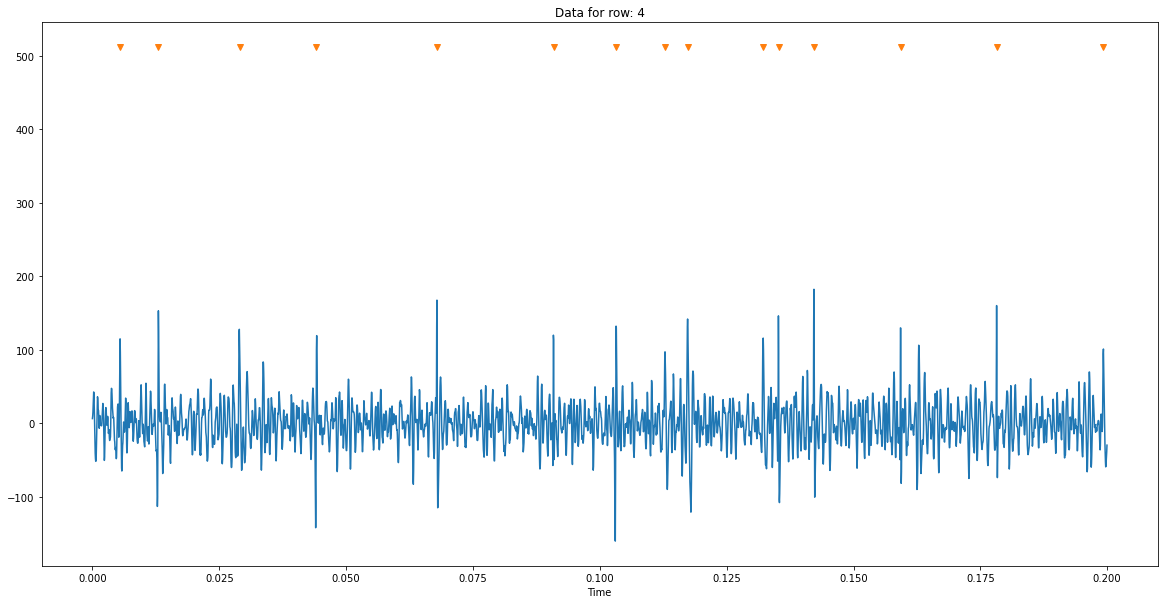

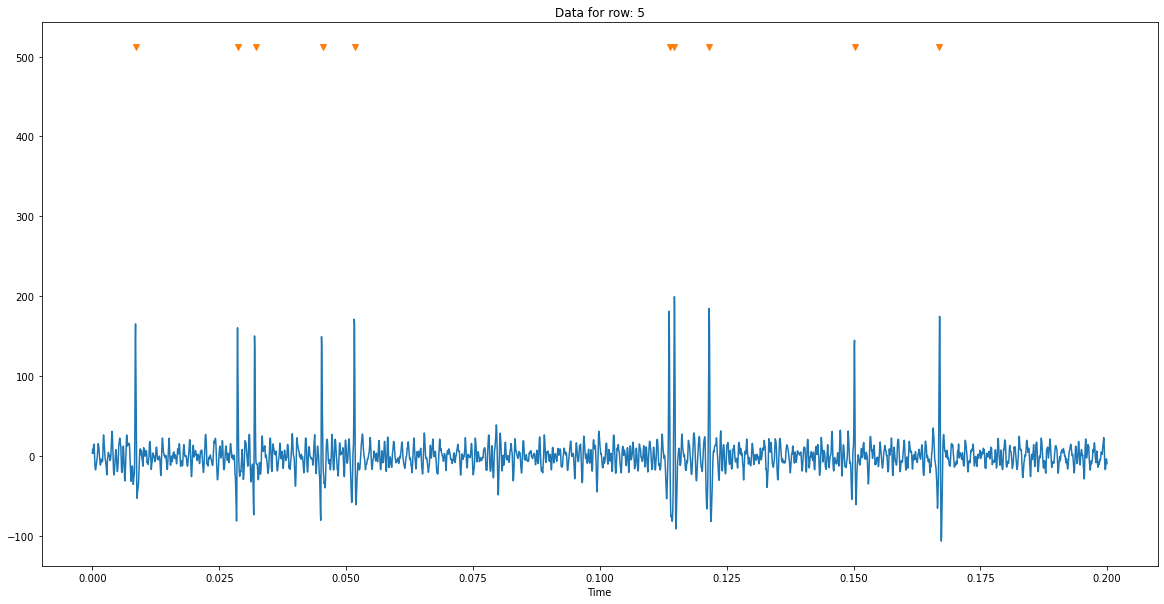

In [61]:
to_plot = 4000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    filtered = butter_highpass_filter(samples, 600, 20000, order=2)
    filtered = iirnotch_filter(filtered, 60, 20000)
    filtered = iirnotch_filter(filtered, 120, 20000)
    filtered = iirnotch_filter(filtered, 180, 20000)
    filtered = iirnotch_filter(filtered, 240, 20000)
    filtered = iirnotch_filter(filtered, 300, 20000)
    filtered = iirnotch_filter(filtered, 360, 20000)
    filtered = iirnotch_filter(filtered, 420, 20000)
    filtered = iirnotch_filter(filtered, 480, 20000)
    filtered = iirnotch_filter(filtered, 540, 20000)

    plt.plot(t[:to_plot], filtered[:to_plot])
    plt.plot(t[:to_plot], spikes[:to_plot], 'v')
    plt.xlabel("Time")
    plt.title("Data for row: "+ str(row_to_plot))
    plt.show()

In row 4, I see some more high frequencies. I'll try to filter some high frequencies from the signal.

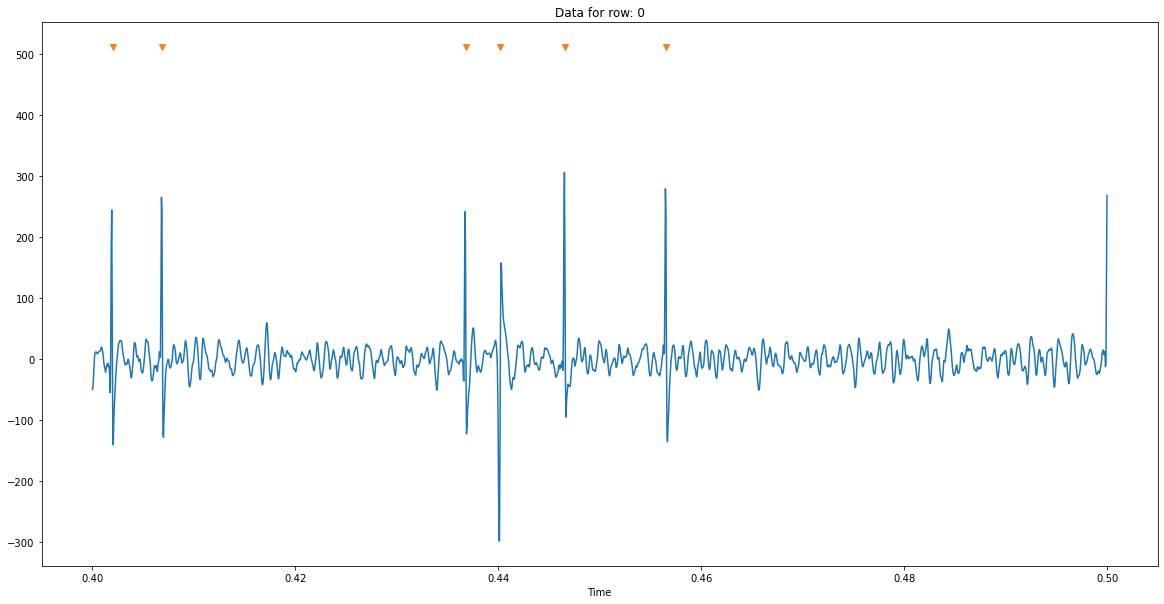

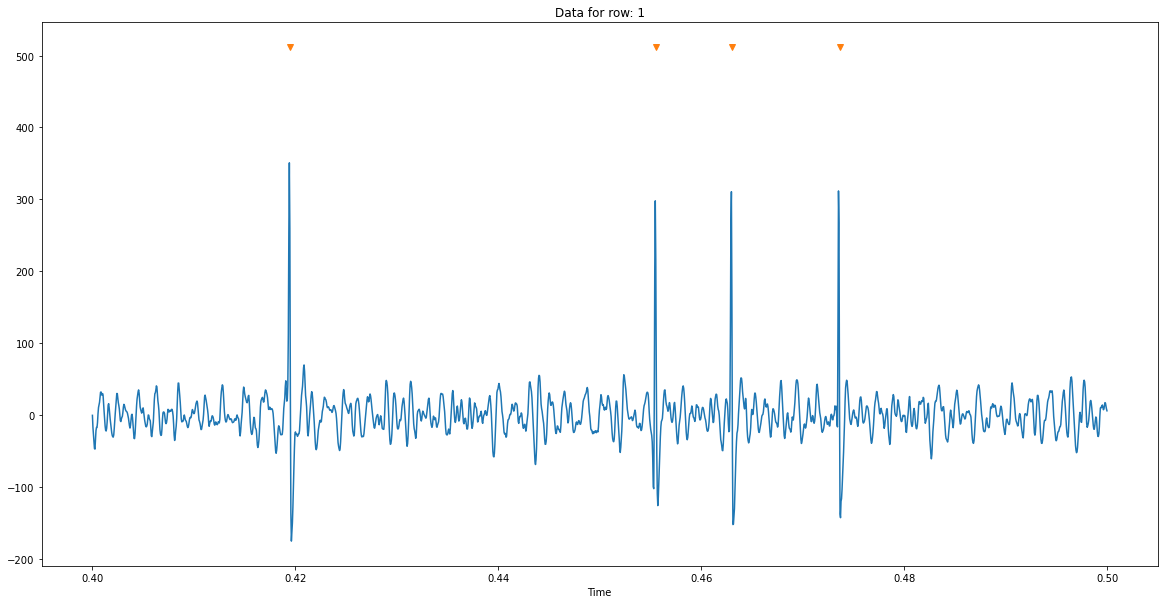

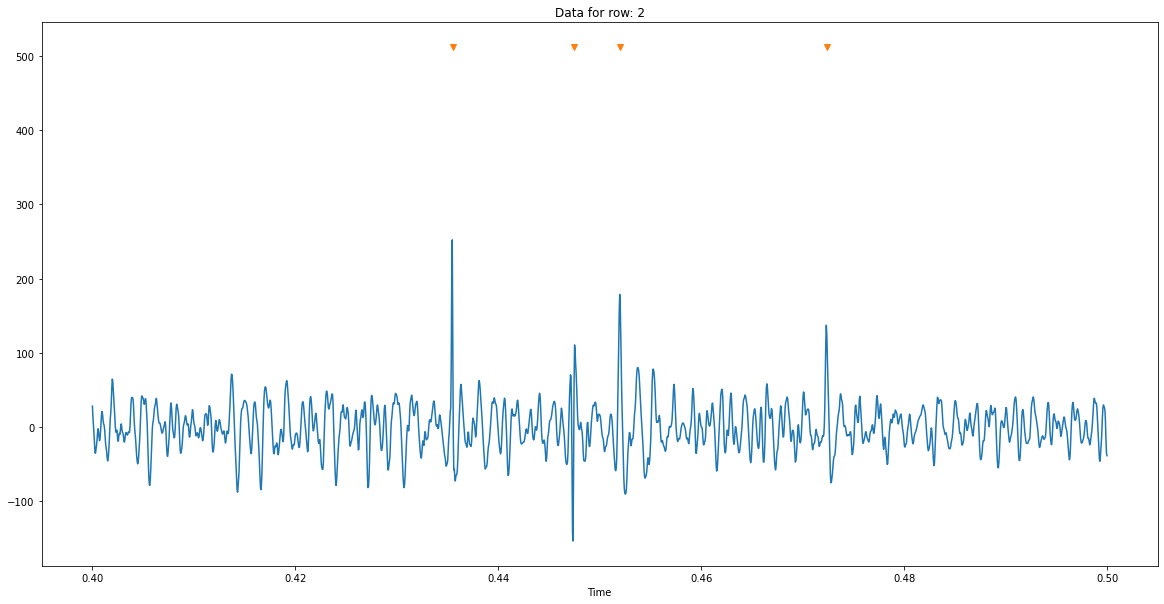

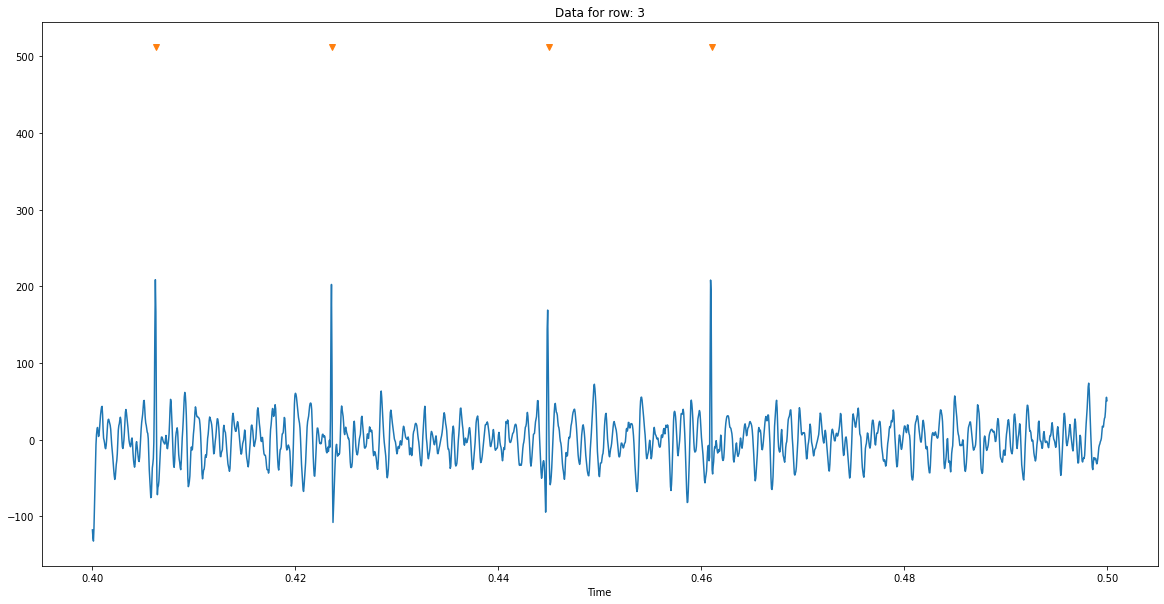

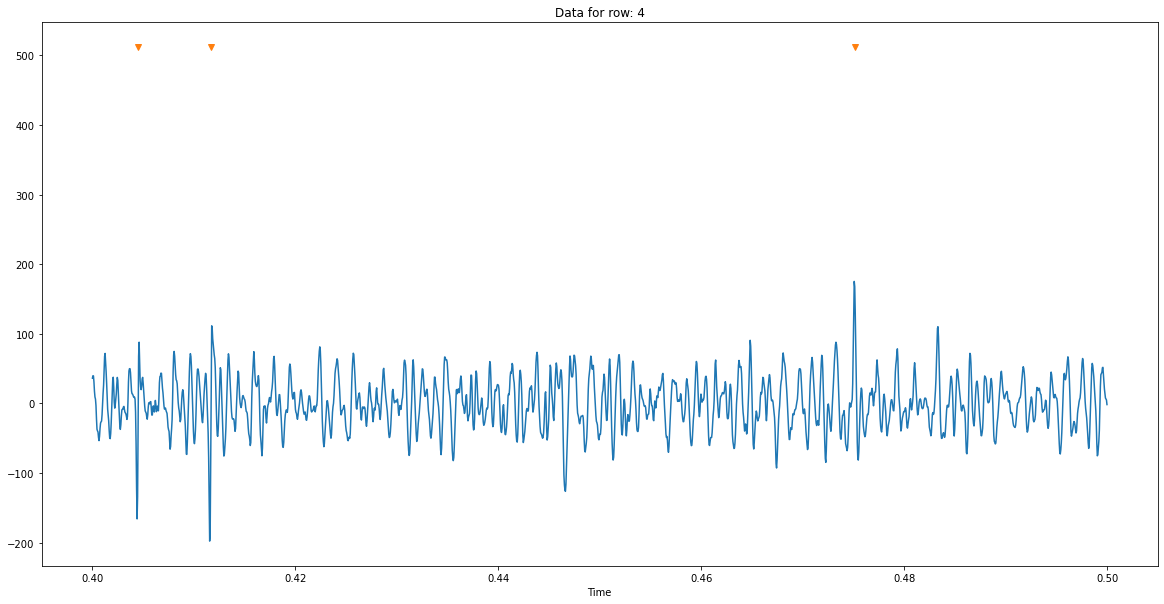

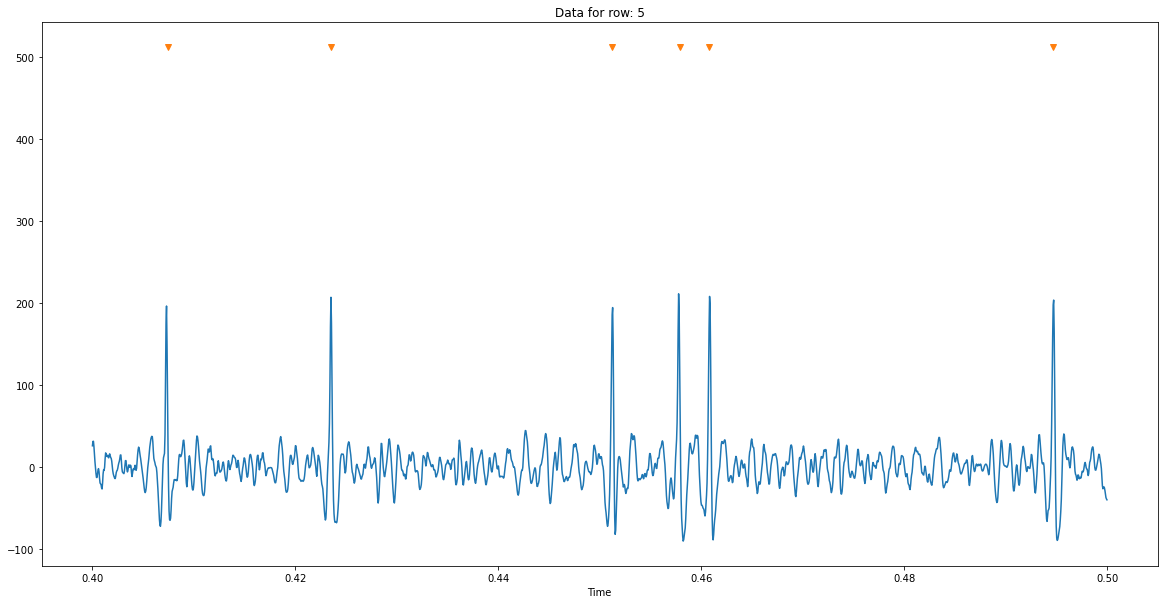

In [99]:
to_plot = 10000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
#     filtered = butter_highpass_filter(samples, 600, 20000, order=8)
#     filtered = butter_lowpass_filter(filtered, 2500, 20000, order=8)
    filtered = butter_bandpass_filter(samples, 450, 6500, 20000, order=10)
    filtered = iirnotch_filter(filtered, 30, 20000)
#     filtered = iirnotch_filter(filtered, 120, 20000)
#     filtered = iirnotch_filter(filtered, 180, 20000)
#     filtered = iirnotch_filter(filtered, 240, 20000)
#     filtered = iirnotch_filter(filtered, 300, 20000)
#     filtered = iirnotch_filter(filtered, 360, 20000)
#     filtered = iirnotch_filter(filtered, 420, 20000)
#     filtered = iirnotch_filter(filtered, 480, 20000)
#     filtered = iirnotch_filter(filtered, 1200, 20000)

    plt.plot(t[to_plot-2000:to_plot], filtered[to_plot-2000:to_plot])
    plt.plot(t[to_plot-2000:to_plot], spikes[to_plot-2000:to_plot], 'v')
    plt.xlabel("Time")
    plt.title("Data for row: "+ str(row_to_plot))
    plt.show()

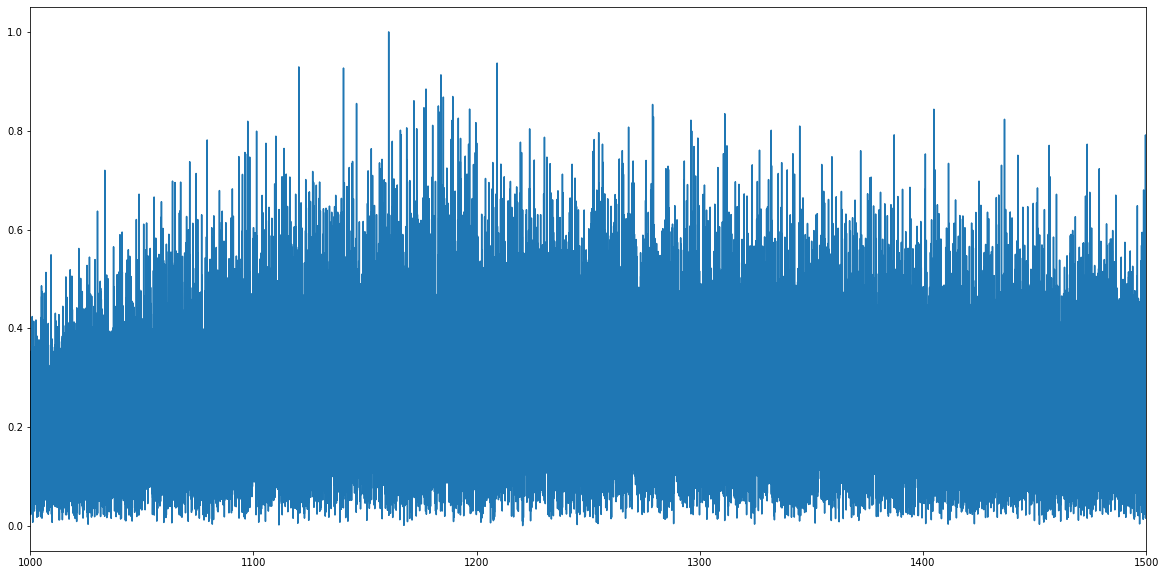

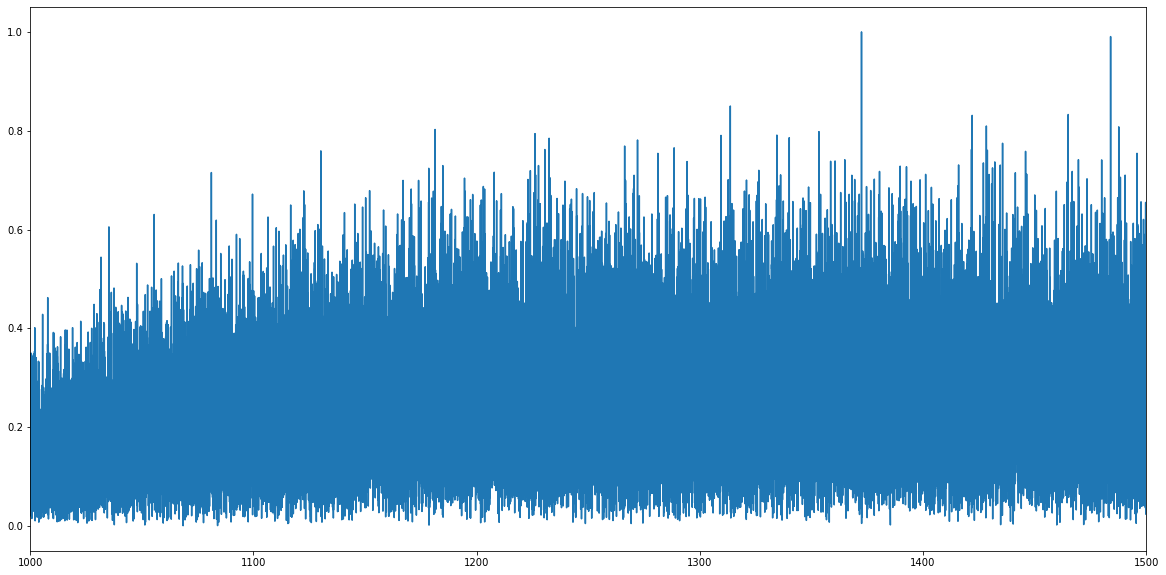

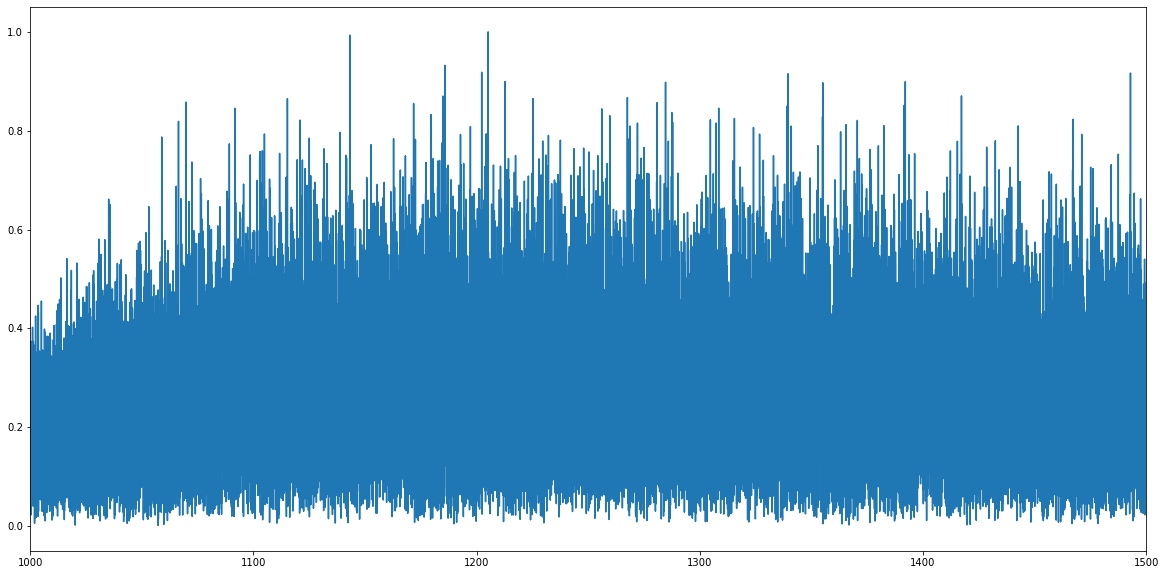

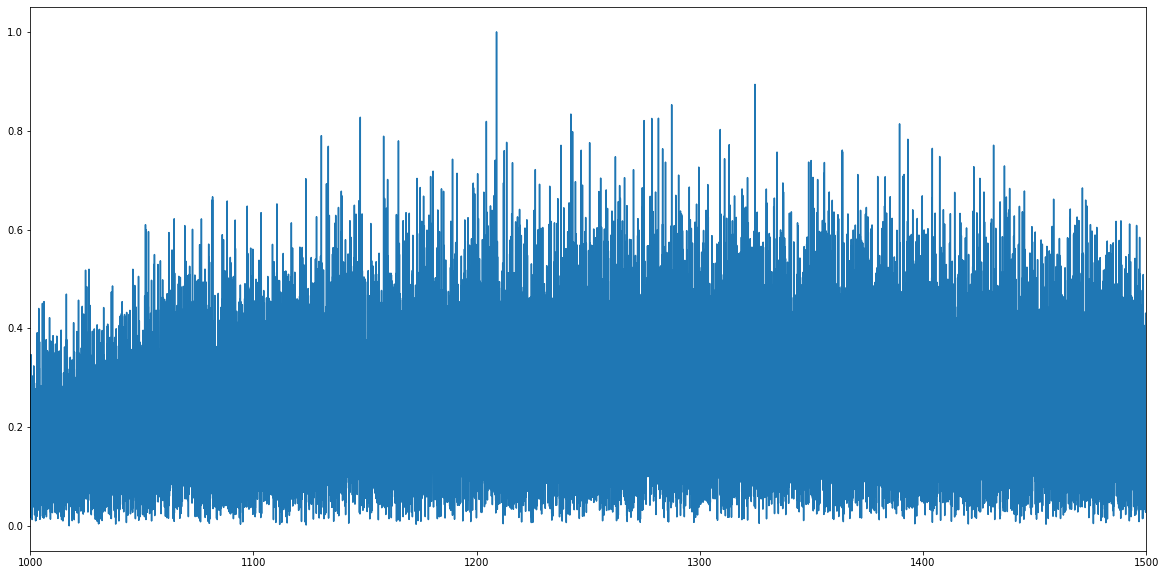

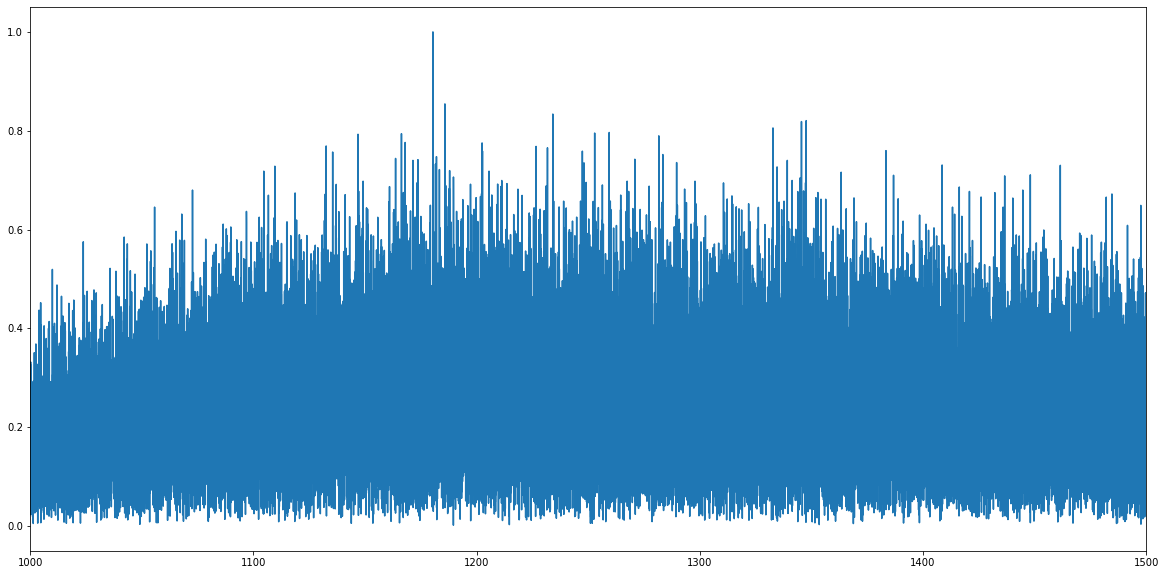

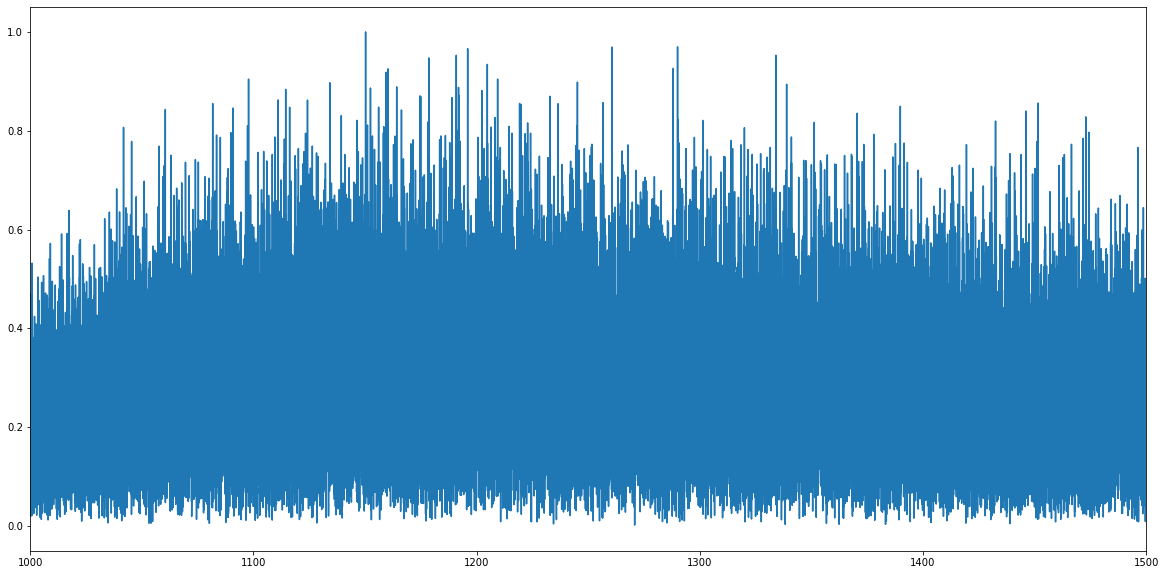

In [94]:
to_plot = 2000

for row_to_plot in range(6):    
    with open(csv_file, 'r') as f:
        original_data = f.read().split('\n')[1:]
        original_data = original_data[row_to_plot].split(',')
        spike_positions = [int(x) for x in original_data[1].split(';')]
        samples = [int(x) for x in original_data[0].split(';')]


    # print(samples[:100])
    # print(spike_positions[:100])
    # To plot the spikes, generate an array of NaNs (which do not get plotted)
    spikes = [math.nan] * len(samples)

    # Plot spike indicators above all samples.
    spike_y = max(samples) + 1

    # Replace the values in the positions of the spikes with the maximum sample value
    for s in spike_positions:
        spikes[s] = spike_y

    # Generate the time vector (fs=20kHz)
    t = [x/20000 for x in range(len(samples))]
    
    filtered = butter_highpass_filter(samples, 1000, 20000, order=8)
    filtered = butter_lowpass_filter(filtered, 3000, 20000, order=8)
    filtered = iirnotch_filter(filtered, 60, 20000)
    filtered = iirnotch_filter(filtered, 120, 20000)
    filtered = iirnotch_filter(filtered, 180, 20000)
    filtered = iirnotch_filter(filtered, 240, 20000)
    filtered = iirnotch_filter(filtered, 300, 20000)
    filtered = iirnotch_filter(filtered, 360, 20000)
    filtered = iirnotch_filter(filtered, 420, 20000)
    filtered = iirnotch_filter(filtered, 480, 20000)
    filtered = iirnotch_filter(filtered, 540, 20000)
#     filtered = iirnotch_filter(filtered, 1200, 20000)
    
    yf = rfft(filtered)
    xf = rfftfreq(len(filtered), 1 / 20000)

    plt.plot(xf, np.abs(yf)/max(np.abs(yf)))
#     plt.ylim(0,0.1)
    plt.xlim(1000,1500)
#     plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480])
    plt.show()

#### It seems that the best idea is to go forward with a bandpass filter between 450Hz and 6500Hz since sharpest peaks seem to appear at that frequency range